# Accessing data from NASA Astrophysics Archives Using Python

NASA missions have collected a huge amount of data spanning a large range in wavelengths. These data are housed in four different archives: the [HEASARC](https://heasarc.gsfc.nasa.gov/), [MAST](https://archive.stsci.edu/), [IRSA](https://irsa.ipac.caltech.edu), [NED](https://ned.ipac.caltech.edu). However, different physical locations are not an obstacle for astronomers doing multiwavelength science projects that need to make use of data from different archives. The archives have been working together to make sure that you don’t need to know too much about *us* to assemble the data you need to get your research done. We’ve done this by standardizing the way that programs can access the data we house. Since Python is a very popular programming language, we are going to use it to show you how you can take advantage of this standardization to put together and analyze a multiwavelength data set. For this workshop, we are using a sample of interacting galaxies, and we will assemble a multiwavelength data set for it. You can generalize this example to much larger data sets of your own.

<a id='toc'></a>

<h2>Table of Contents</h2>

<a href='#availabledatasets'>1. Available Data Sets</a>

<a href='#sample'>2. Sample of Interacting Galaxies</a>

<a href = "#ned">3. Data Discovery -- NASA Extragalactic Database</a>

<a href = "#registry">4. Data Discovery -- The Registry</a><BR>

<a href = "#registryheasarc">4a. Search the registry for simple image access resources available from HEASARC</a><BR>

<a href = "#registryallwise">4b. Search the registry for AllWISE</a><BR>

<a href = "#registrymultiwavelength">4c. Define Base URLs for GALEX, AllWISE, and 2MASS.<BR>

<a href = "#simpleimageaccess">5. Simple Image Access</a>

<a href = "#ucd">6. Universal Common Descriptors (UCDs)</a>

<a href = "#fetch">7. Retrieve the images that you found</a>

<a href = "#multiwavelengthsearch">8. Search a list of data sets for images that cover a position on the sky</a><BR>

<a href = "#cutouts">9. Make Cutouts</a><BR>

<a href = "#simpleconesearch">10. Catalogs: Simple Cone Search</a><BR>

<a href = "#tableaccessprotocol">11. Catalogs: Table Access Protocol</a><BR>

<a href = "#simplespectralaccess">12. Simple Spectral Access</a><BR>


<a id='availabledatasets'></a>

## 1. Available Data Sets

NASA Archives offer many publically available data sets over a large range in wavelengths. Below is a summary of what you can expect from each of the archives.

The **NASA/IPAC Extragalactic Database (NED)** is a comprehensive multiwavelength database for extragalactic objects, providing a systematic, ongoing fusion of information integrated from hundreds of large sky surveys and over a hundred thousand research publications. The contents and services span the entire observed spectrum from gamma rays through radio frequencies. As new observations are published, they are crossidentified with previous data and integrated into a unified database to simplify queries and retrieval.The LEVEL 5 Knowledgebase enhances review articles
in extragalactic astrophysics and cosmology with direct links from object names and graphical content to related database queries.

The **High Energy Astrophysics Science Archive Research Center (HEASARC)** is the primary archive for high-energy astronomy orbital missions observing at extreme ultraviolet, X-ray and gamma-ray wavelengths. Several of these missions, including Chandra, Fermi and XMM-Newton, fall under NASA's Physics of the Cosmos (PCOS) theme, while others, such as NICER, NuSTAR and Swift, are part of NASA's Explorers program. Since its merger with the Legacy Archive for Microwave Background Data Analysis (LAMBDA) in 2008, the HEASARC's holdings also include data from space-based missions, balloons, and ground-based facilities, such as COBE, WMAP, ACT, etc., that have studied the relic cosmic microwave background (CMB).

The **Mikulski Archive for Space Telescopes (MAST)** is a NASA-funded archive for a wide range of astronomical missions, primarily supporting space-based ultraviolet, optical and near-infrared telescopes. Best known as the archive for the Hubble Space Telescope (HST), MAST also archives data from other projects such as Kepler, GALEX, PanSTARRS, FUSE, and over 100 community-contributed collections of High-Level Science Products. Future missions will include the James Webb Space Telescope (JWST) and the Transiting Exoplanet Survey Satellite (TESS).

The **NASA/IPAC Infrared Sciece Archive (IRSA)** is chartered to curate the science products of NASA's infrared and submillimeter missions, as well as data from related projects. These include data from pointed observatories such as Spitzer and Herschel, as well as large-area and all-sky surveys such as 2MASS, WISE, IRAS, Planck, and AKARI. In total, IRSA provides access to more than 20 billion astronomical measurements, including all-sky coverage in 24 bands. 

<a href = "#toc">Table of Contents</a>

<a id='sample'></a>

## 2. Science Sample for Today: Interacting Galaxies

A HEASARC scientist is studying a sample of potentially interacting galaxies, and these will be the focus of our examples during this workshop. She has put the coordinates of these galaxies into a simple CSV file.

In [223]:
from astropy.io import ascii
list_of_galaxies = ascii.read('interacting_gals.csv', delimiter=',')  
print(list_of_galaxies)     

   ra     dec  
------- -------
9.90704 8.96507
19.0186 46.7304
20.2887 40.4703
125.886 21.3377
136.002 21.9679
141.057 40.6372
  146.7 22.0116
148.785 14.2922
149.751 17.8168
175.039  15.327
    ...     ...
241.519 20.8014
317.088 18.2002
329.235 6.64845
 333.83 37.3012
335.756 30.9249
344.396 19.7827
348.682 4.53407
 350.39 27.1181
350.438 9.07761
357.827 20.5778
0.36165 31.4334
Length = 30 rows


<a href = "#toc">Table of Contents</a>

<a id='ned'></a>

## 3. Data Discovery: NASA/IPAC Extragalactic Database (NED)

A common first step in extragalactic studies is to search NED to see what is already in the literature about your sample. In this example, we are going to do a quick SED search to find out which missions cover most of these galaxies. This will give us on overview of what kinds of data we might be interested in exploring in more detail.

In [224]:
## Suppress unimportant warnings.
import warnings
warnings.filterwarnings("ignore")

Add a simple concrete example doing a NED example. Querying NED for SED. Talk about how other queries that NED might have, and consider adding a VO query.

Start with this simple cone search
http://vao.stsci.edu/directory/getRecord.aspx?id=ivo://ned.ipac/Basic_Data_Near_Position

In [225]:
#Import necessary Python modules.
import io
import requests
from astropy.table import Table
import urllib.parse

#Most queries start with a Base URL that you append your query parameters to.
ned_base_url = 'http://vo.ned.ipac.caltech.edu'
ned_sed_query_path = '/services/querySED?REQUEST=queryData'

#Create a string that contains the search radius you want. Let's do 5 arcsec
search_radius = str(5.0 / 3600.0)

#For each galaxy in our sample,
i = 0
for galaxies in list_of_galaxies:
    print(' ')
    print(i)
    
    #Create a string that contains position information.
    position = str(galaxies['ra'])+','+str(galaxies['dec'])
    
    #Now string the URL together with the position and size parameters. Each paramter is 
    #separated by an ampersand.
    ned_objects_url = ned_base_url+ned_sed_query_path+'&POS='+position+'&SIZE='+search_radius
    
    #Send the URL as a request to NED, and capture the response.
    ned_objects_response = requests.get(ned_objects_url)
    
    #If the response is OK,
    if ned_objects_response.status_code == 200:
        
        #Put the table that is returned from NED into an astropy table.
        ned_objects_table = Table.read(io.BytesIO(ned_objects_response.content))
        
        #Extract the Access URL in the response, removing special characters.
        ned_targetname_url = ned_base_url+urllib.parse.quote(ned_objects_table[0]['ACREF'], safe = '/,&,?,=')

        #Retrieve the SED using the Access URL, put it into an Astropy table,
        #And print the passbands in the SED.
        if len(ned_objects_table) > 0: 
            ned_data_response = requests.get(ned_targetname_url)
            if ned_data_response.status_code == 200:
                ned_data_table = Table.read(io.BytesIO(ned_data_response.content))
                print(ned_data_table['DataSpectralPassBand'])
                
                
                
    i = i + 1


 
0
DataSpectralPassBand
--------------------
      FUV (GALEX) AB
      FUV (GALEX) AB
      NUV (GALEX) AB
      NUV (GALEX) AB
                 m_p
             B (m_B)
           B (m_B^0)
                   I
                   I
  J_14arcsec (2MASS)
                   J
                   J
                   H
  H_14arcsec (2MASS)
                   H
                 K_s
K_s_14arcsec (2MASS)
                 K_s
 
1
DataSpectralPassBand
--------------------
                 m_p
   V (Johnson) (OAN)
   R (Cousins) (OAN)
   I (Cousins) (OAN)
                   J
  J_14arcsec (2MASS)
                   J
  H_14arcsec (2MASS)
                   H
                   H
K_s_14arcsec (2MASS)
                 K_s
                 K_s
  4.5 microns (IRAC)
  4.5 microns (IRAC)
  5.8 microns (IRAC)
  5.8 microns (IRAC)
  8.0 microns (IRAC)
  8.0 microns (IRAC)
              1.4GHz
 
2
DataSpectralPassBand
--------------------
                 m_p
                   J
                   J
 

DataSpectralPassBand
--------------------
      FUV (GALEX) AB
      FUV (GALEX) AB
      NUV (GALEX) AB
      NUV (GALEX) AB
      NUV (GALEX) AB
      NUV (GALEX) AB
 
20
DataSpectralPassBand
--------------------
      FUV (GALEX) AB
      NUV (GALEX) AB
      NUV (GALEX) AB
 
21
DataSpectralPassBand
--------------------
                J_pg
                F_pg
                   J
  J_14arcsec (2MASS)
                   J
  H_14arcsec (2MASS)
                   H
                   H
K_s_14arcsec (2MASS)
                 K_s
                 K_s
 
22
DataSpectralPassBand
--------------------
                 m_p
                   J
                   J
  J_14arcsec (2MASS)
                   H
                   H
  H_14arcsec (2MASS)
                 K_s
                 K_s
K_s_14arcsec (2MASS)
   60 microns (IRAS)
  100 microns (IRAS)
 
23
DataSpectralPassBand
--------------------
                   J
                   J
  J_14arcsec (2MASS)
                   H
              

By perusing the above, we can see that there are several data sets that crop up again and again. For the sake of this workshop, we will concentrate on GALEX, WISE, and 2MASS.

<a href = "#toc">Table of Contents</a>

<a id='registry'></a>

## 4. Data Discovery -- The Registry

Archives register their data sets so that programs can discover them:
http://vao.stsci.edu/keyword-search/

The link above is a GUI, so you can play around with it. There is also an applications program interface (API) to this service, so that programs can send queries and retrieve search results automatically.

<a id='registryheasarc'></a>

### 4a. Find all simple image access data sets from HEASARC.

In [228]:
#Base URL for the registry
registry_url = "https://vao.stsci.edu/RegTAP/TapService.aspx/sync"

#Parameters to append to the Base URL.
tap_params = {
    "request":"doQuery",
    "lang":"ADQL",
    "query":"""
        select cap.ivoid,res.short_name,res.res_description,res.reference_url,int.access_url
        from rr.capability cap
        natural join rr.resource res
        natural join rr.interface int
        where cap.cap_type='simpleimageaccess' and cap.ivoid like 'ivo://%heasarc%'
        order by short_name;
    """
    }

#Send the request to the registry
r = requests.post(registry_url, data = tap_params)

#Put the results in an astropy table.
table=Table.read(io.BytesIO(r.content))

# Display results in a readable way including the 
# short_name, ivoid, res_description and reference_url.
from IPython.display import Markdown, display

for row in table:
    md = '### {} ({})'.format(row['short_name'].decode('utf-8'), row['ivoid'].decode('utf-8'))
    display(Markdown(md))
    print(row['res_description'].decode('utf-8'))
    print('More info: {}'.format(row['reference_url'].decode('utf-8')))
    print('Access URL: {}'.format(row['access_url'].decode('utf-8')))

### 1420MHz (ivo://nasa.heasarc/skyview/1420mhz)

This survey was taken with the Bonn Stockert 25m telescope. It was distributed on the NRAO &amp;lt;i&amp;gt;Images from the Radio Sky&amp;lt;/i&amp;gt; CD-ROM. This image was delivered as a four map mosaic but was combined into a single map before being included in &amp;lt;i&amp;gt;SkyView&amp;lt;/i&amp;gt;.
More info: https://skyview.gsfc.nasa.gov
Access URL: https://skyview.gsfc.nasa.gov/cgi-bin/vo/sia.pl?survey=1420mhz&amp;


### 2MASS (ivo://nasa.heasarc/skyview/2mass)

2MASS data were collected by uniformly scanning the entire sky in three near-infrared bands to detect and characterize point sources brighter than ab2mass\.xml\.out 1 mJy in each band, with signal-to-noise ratio (SNR) greater than 10, using a pixel size of 2.0". This achieves an 80,000-fold improvement in sensitivity relative to earlier surveys. 2MASS used two new, highly-automated 1.3-m telescopes, one at Mt. Hopkins, AZ, and one at CTIO, Chile. Each telescope is equipped with a three-channel camera, each channel consisting of a 256 by 256 array of HgCdTe detectors, capable of observing the sky simultaneously at J (1.25 microns), H (1.65 microns), and K&amp;lt;sub&amp;gt;s&amp;lt;/sub&amp;gt; (2.17 microns). &amp;lt;p&amp;gt;2MASS images and other data products can be obtained at the &amp;lt;a href="http://irsa.ipac.caltech.edu/applications/2MASS/QL/"&amp;gt;NASA/IPAC Infrared Science Archive&amp;lt;/a&amp;gt;
More info: https://skyview.gsfc.nasa.gov
Access URL: https://skyview.gsfc.n

### 408MHz (ivo://nasa.heasarc/skyview/408mhz)

This survey is a mosaic of data taken at Jodrell Bank, Effelsberg and Parkes telescopes. The data was distributed in the NRAO &amp;lt;i&amp;gt;Images from the Radio Sky&amp;lt;/i&amp;gt; CD ROM.
More info: https://skyview.gsfc.nasa.gov
Access URL: https://skyview.gsfc.nasa.gov/cgi-bin/vo/sia.pl?survey=408mhz&amp;


### AKARI (ivo://nasa.heasarc/skyview/akari)

The AKARI (formerly Astro-F) mission is a Japanese second generation all-sky infrared survey mission. SkyView currently includes surveys from the four bands of the FIS instrument: N60, WIDE-S, WIDE-L and N160. &amp;lt;p&amp;gt; These surveys cover 99% of the sky in four photometric bands centred at 65µm, 90µm, 140µm, and 160µm, with spatial resolutions ranging from 1-1.5'. &amp;lt;p&amp;gt; These data provide crucial information on the investigation and characterisation of the proper- ties of dusty material in the interstellar medium (ISM), since a significant portion of its energy is emitted between ~50 and 200 µm. The large-scale distribution of interstellar clouds, their thermal dust temperatures, and their column densities can be investigated with the improved spatial resolution compared to earlier all-sky survey observations. In addition to the point source distribution, the large-scale distribution of ISM cirrus emis- sion, and its filamentary structure, are well traced. &amp;lt;

### ASCA (ivo://nasa.heasarc/ascamaster)

The ASCAMASTER table contains data on all ASCA observations that were ever in any of the following states: 'Accepted', 'Scheduled Long-Term', 'Scheduled Short-Term', 'Processed', and 'Archived'. The final status of an observation is given by the parameter Status. Specific dates that affect the status of an observation are listed as the parameters scheduled_date, observed_date, processed_date, archived_date, and cycle. Notice that, if one or more of the date parameters are empty for a given observation, this means that that those particular processes have not occurred: e.g., if observed_date is empty, this means that the planned observation was not observed.
More info: https://heasarc.gsfc.nasa.gov/W3Browse/all/ascamaster.html
Access URL: https://heasarc.gsfc.nasa.gov/xamin/vo/sia?table=ascamaster&amp;


### ASCA/AGN (ivo://nasa.heasarc/tartarus)

The Tartarus database contains the results of a detailed but systematic analysis of ASCA observations of active galactic nuclei (AGN). It contains source and background events files, spectra, ancillary response files and response matrices, images, and assorted light curves for a large number of ASCA AGN observations. Spectral fit results are done by automatic XSPEC fitting. This database table allows easy access to reduced AGN data for the whole community, allowing the maximum scientific return from the data. Availability of publishable light curves, images, and spectra (which can also be readily re-fitted) should be particularly valuable to astronomers with little direct experience in the reduction of X-ray data. Version 3.1 has been created by analyzing all ASCA observing sequences with targets designated as AGN, as indicated by a leading &amp;quot;7&amp;quot; in the ASCA observing sequence number. Version 3.1 contains products for all 611 observing sequences designated as AGN observ

### ASCASIS (ivo://nasa.heasarc/ascasis)

This preliminary ASCA SIS Source Catalog contains a list of point sources detected by the Solid-state Imaging Spectrometers (SIS) on-board the ASCA Observatory. This catalog was generated by searching for point-like sources in all data available from the HEASARC's ASCA PUBLIC archive (ASCAPUBLIC) as of 24 Oct 1996; and is populated by both target and serendipitous sources in the SIS field-of-view. For each cataloged source various information is available, which includes the celestial coordinates of the source, the count rate, the significance of detection, and the hardness ratio, total aperture counts, exposure time, and start time of the observation. In addition, a set of three GIF &amp;quot;thumbnail&amp;quot; images is available in the broad (0.5 - 12 keV), soft (2 &amp;lt; keV), and hard (&amp;gt; 2 keV) spectral bands centered on the apparent detection. These images are convenient for accessing the quality of the source detection. The current catalog is preliminary, the goal of t

### BAT-flux-1 (ivo://nasa.heasarc/skyview/bat-flux-1)

This BAT Hard X-ray Survey data is the 70-month survey product of the BAT instrument on the Swift observatory. Swift/BAT is a wide field-of-view (70x100 degrees) hard X-ray imager consisting of a coded mask and a large array of CdZnTe detectors (with an effective area of ~ 5000 cm&amp;lt;sup&amp;gt;2&amp;lt;/sup&amp;gt;). &amp;lt;p&amp;gt; BAT is sensitive in the energy range 14-195 keV. The data are divided into 8 energy bands &amp;lt;table border&amp;gt; &amp;lt;tr&amp;gt;&amp;lt;th&amp;gt;Band&amp;lt;th&amp;gt;Energy (keV)&amp;lt;th&amp;gt;Frequency (EHz) &amp;lt;/tr&amp;gt; &amp;lt;tr&amp;gt;&amp;lt;td&amp;gt;1&amp;lt;td&amp;gt; 14-20 &amp;lt;td&amp;gt; 3.38-4.84&amp;lt;/tr&amp;gt; &amp;lt;tr&amp;gt;&amp;lt;td&amp;gt;2&amp;lt;td&amp;gt; 20-24 &amp;lt;td&amp;gt; 4.84-5.80&amp;lt;/tr&amp;gt; &amp;lt;tr&amp;gt;&amp;lt;td&amp;gt;3&amp;lt;td&amp;gt; 24-35 &amp;lt;td&amp;gt; 5.80-8.46&amp;lt;/tr&amp;gt; &amp;lt;tr&amp;gt;&amp;lt;td&amp;gt;4&amp;lt;td&amp;gt; 35-50 &amp;lt;td&amp;gt; 8.46

### BATSIG (ivo://nasa.heasarc/skyview/batsig)

The BAT Hard X-ray Survey data is a product of the BAT instrument on the Swift observatory. Swift/BAT is a wide field-of-view (70x100 degrees) hard X-ray imager consisting of a coded mask and large array of CdZnTe detectors (5000 cm&lt;sup&gt;2&lt;/sup&gt;). The primary purpose of BAT is the detection gamma-ray bursts and the BAT survey data is collected during the search for gamma-ray bursts. &lt;p&gt; BAT is sensitive in the energy range 14-195 keV. The data from the first 9 months of the survey is divided into 4 energy channels: 14-24, 24-50, 50-100, and 100-195 keV. Each of these is represented as separate survey, and an averaged survey over all bands is also given. &lt;p&gt; The all sky maps are presented in two forms, the significance maps and the flux maps. The significance maps are the count rate divided by the noise (sigma RMS) in a region of the map around the position. The noise is variable across the sky due to variable exposure and systematic noise. The noise is Gaussian a

### CDFS-LESS (ivo://nasa.heasarc/skyview/cdfs-less)

The LABOCA Extended Chandra Deep Field South (ECDFS) Submillimetre Survey (LESS) is a public legacy survey of the ECDFS at 870 µm using the LABOCA camera (Siringo et al. 2009) on the APEX telescope. &amp;lt;p&amp;gt; The LABOCA data presented here were obtained between 2007 May and 2008 November in excellent conditions using time from both ESO and Max Planck allocations. The mapping pattern was designed to uniformly cover the 30'x30' extent of the ECDFS, centered on 03:32:29.0, -27:48:47.0 (J2000). The project used a total of 310 hrs of observations to achieve a beam-smoothed noise of 1.2 mJy/beam over 900 sq. arcmin (and &amp;lt; 1 .6mJy/beam over 1260 sq. arcmin). The flux calibration of the map came from observations of Mars, Uranus and Neptune (as well as secondary calibrators) and is accurate to within 8.5%.
More info: https://skyview.gsfc.nasa.gov
Access URL: https://skyview.gsfc.nasa.gov/cgi-bin/vo/sia.pl?survey=cdfs-less&amp;


### CFHTLS-D-u (ivo://nasa.heasarc/skyview/cfhtls-d-u)

The Canada-France-Hawaii Telescope Legacy Survey is a 5-year program carried cfhtls\-d\.xml\.out jointly by the Canadian and French agencies. It will use the Megaprime/Megacam instrument mounted at prime focus of the 3.6m CFH telescope during the period 2003-2008. The Deep survey concerns 4 patchsof 1 square-degree. All will be observed in u,g,r,i and z, with very lon gexposure time&amp;lt;p&amp;gt; This survey description was generated automatically from the &amp;lt;a href='http://alasky.u-strasbg.fr/CFHTLS-T0007b/Deep/UALLSKY/properties'&amp;gt;HiPS property file&amp;lt;/a&amp;gt;
More info: https://skyview.gsfc.nasa.gov
Access URL: https://skyview.gsfc.nasa.gov/cgi-bin/vo/sia.pl?survey=cfhtls-d-u&amp;


### CFHTLS-W-u (ivo://nasa.heasarc/skyview/cfhtls-w-u)

The Canada-France-Hawaii Telescope Legacy Survey is a 5-year program carried cfhtls\-w\.xml\.out jointly by the Canadian and French agencies. It will use the Megaprime/Megacam instrument mounted at prime focus of the 3.6m CFH telescope during the period 2003-2008. The WIDE survey concerns 4 patchs, 3 of abcfhtls\-w\.xml\.out 7x7 square-degrees each and 1 of abcfhtls\-w\.xml\.out 4x4 square-degrees. All will be observed in u,g,r,i and z, with abcfhtls\-w\.xml\.out 1 hr exposure time per filter&amp;lt;p&amp;gt; This survey description was generated automatically from the &amp;lt;a href='http://alasky.u-strasbg.fr/CFHTLS-T0007b/Wide/UALLSKY/properties'&amp;gt;HiPS property file&amp;lt;/a&amp;gt;
More info: https://skyview.gsfc.nasa.gov
Access URL: https://skyview.gsfc.nasa.gov/cgi-bin/vo/sia.pl?survey=cfhtls-w-u&amp;


### Chandra (ivo://nasa.heasarc/chanmaster)

This database table contains all of the observations made by the Chandra X-Ray Observatory (CXO, formerly known as the Advanced X-ray Astrophysics Facility or AXAF) as part of the Performance Verification and Calibration (PVC) phase and also contains all of the subsequent Cycles' Guaranteed Time Observers (GTO) and General Observer (GO) targets, and any Director's Discretionary Time (DDT) targets that have been observed. It also includes scheduled and as-yet-not-scheduled targets. The HEASARC updates this database table on a twice-weekly basis by querying the database table at the Chandra X-Ray Center (CXC) website, as discussed in the Provenance section. For observations whose status is 'archived', data products can be retrieved from the HEASARC's mirror of the CXC's Chandra Data Archive (CDA). The CXC should be acknowledged as the source of Chandra data. The PVC phase was during the first few months of the CXO mission; some of the calibration observations that are for monitoring purp

### CO (ivo://nasa.heasarc/skyview/co)

New large-scale CO surveys of the first and second Galactic quadrants and the nearby molecular cloud complexes in Orion and Taurus, obtained with the Harvard-Smithsonian Center for Astrophysics 1.2 m telescope, have been combined with 31 other surveys obtained over the past two decades with that instrument and a similar telescope on Cerro Tololo in Chile, to produce a new composite CO survey of the entire Milky Way. The survey consists of 488,000 spectra that Nyquist or beamwidth (1/8 deg) sample the entire Galactic plane over a strip 4 deg-10 deg wide in latitude, and beamwidth or 1/4 deg sample nearly all large local clouds at higher latitudes. Compared with the previous composite CO survey of Dame et al. (1987), the new survey has 16 times more spectra, up to 3.4 times higher angular resolution, and up to 10 times higher sensitivity per unit solid angle. &amp;lt;P&amp;gt; Users should be aware that both the angular resolution and the sensitivity varies from region to region in the v

### COBE (ivo://nasa.heasarc/skyview/cobe)

The DIRBE Project Data Sets cover the whole sky and provide photometric data in 10 bands ranging in wavelength from 1.25 to 240 microns. SkyView has supported three maps: an early averaged map including including zodiacal and Galactic components (COBE DIRBE (OLD)), a more recent cleaner version of that data (COBE DIRBE/AAM) and a map with the zodaical light subtracted cobe\.xml\.out (COBE DIRBE/ZSMA). The early data is no longer supported. Please contact us if you want access to these data. &amp;lt;P&amp;gt; Detailed descriptions of the DIRBE, the data processing, and the data products are given in an Explanatory Supplement. A Small Source Spectral Energy Distribution Browser can be used to assess the visibility of an unresolved or small extended source in the DIRBE data and see its spectral energy distribution. As noted in section 5.6.6 of the Explanatory Supplement, the DIRBE Time-ordered Data are required to derive definitive point source fluxes. &amp;lt;p&amp;gt; These maps provide

### Comptel (ivo://nasa.heasarc/skyview/comptel)

This survey is a maximum entropy solution to the data taken by the CompTel instrument on the &amp;lt;i&amp;gt; Compton &amp;lt;/i&amp;gt; Gamma-ray Observatory. The data in this survey are intended only to give the general appearance of the MeV gamma-ray sky. Fluxes, flux limits and spectra should be derived using the Compass system for the analysis of CompTel data. Compass is available at the &amp;lt;a href="https://cossc.gsfc.nasa.gov/cossc/cossc.html"&amp;gt; Compton Observatory Science Support Center &amp;lt;/a&amp;gt;. &amp;lt;P&amp;gt; The maps were originally generated by the CompTel Instrument Team as three separate maps in the bands: &amp;lt;UL&amp;gt; &amp;lt;LI&amp;gt;1-3 MeV &amp;lt;LI&amp;gt;3-10 MeV &amp;lt;LI&amp;gt;10-30 MeV &amp;lt;/ul&amp;gt; &amp;lt;P&amp;gt; All CompTel observations from phases 1, 2 and 3 were included in the maps (May 1991 through October 1994). These maps were combined into a single 3-D map at &amp;lt;i&amp;gt; SkyView &amp;lt;/i&amp;gt; &amp;lt;P

### DSS (ivo://nasa.heasarc/skyview/dss)

This survey comprises the compressed digitization of the Southern Sky Survey and the Palomar Sky Survey E plates as distributed on CD ROM by the Space Telescope Science Institute. Coverage of the entire sky is included. This survey consists of the digititized Southern Sky Survey conducted at the UK Southern Schmidt Survey Group by the Royal Observatory, Edinburgh (prior to 1988) and the Anglo-Australian Observatory (since 1988) Additional plates covering regions with bright objects are also included. The plates were digitized at the Space Telescope Science Institute and compressed using algorithms developed by R.White. These data are distributed on a set of 101 CD-ROMs. &amp;lt;P&amp;gt; The following data are included: &amp;lt;DL&amp;gt; &amp;lt;DT&amp;gt;Southern hemisphere &amp;lt;DD&amp;gt; SERC Southern Sky Survey and the SERC J Equatorial extension. These are typically deep, 3600s, IIIa-J exposures with a GG395 filter. Also included are 94 short (1200s) V exposures typically at G

### DSS1B (ivo://nasa.heasarc/skyview/dss1b)

This survey uses the POSS1 Blue plates.
More info: https://skyview.gsfc.nasa.gov
Access URL: https://skyview.gsfc.nasa.gov/cgi-bin/vo/sia.pl?survey=dss1b&amp;


### DSS1R (ivo://nasa.heasarc/skyview/dss1r)

This survey is the POSS1 Red plates from the original POSS survey. It covers the sky north of -30 degrees declination.
More info: https://skyview.gsfc.nasa.gov
Access URL: https://skyview.gsfc.nasa.gov/cgi-bin/vo/sia.pl?survey=dss1r&amp;


### DSS2 (ivo://nasa.heasarc/skyview/dss2)

&amp;lt;P&amp;gt; The native projection of these data is described as a high-order polynomial distortion of a gnomonic projection using the same terms as the DSS.
More info: https://skyview.gsfc.nasa.gov
Access URL: https://skyview.gsfc.nasa.gov/cgi-bin/vo/sia.pl?survey=dss2&amp;


### EBHIS (ivo://nasa.heasarc/skyview/ebhis)

The Effelsberg-Bonn HI Survey (EBHIS) is a 21-cm survey performed with the 100-m telescope at Effelsberg. It covers the whole northern sky out to a redshift of z ~ 0.07 and comprises HI line emission from the Milky Way and the Local Volume. This dataset is the atomic neutral hydrogen (HI) column density map derived from the Milky-Way part of EBHIS (|Vlsr| &amp;lt; 600 km/s).
More info: https://skyview.gsfc.nasa.gov
Access URL: https://skyview.gsfc.nasa.gov/cgi-bin/vo/sia.pl?survey=ebhis&amp;


### EGRET (ivo://nasa.heasarc/skyview/egret)

These data are from the Compton GRO EGRET team. Data are from all pointings of the EGRET instrument in the verification phase and phase 1-4 of the Compton mission. The maps exist in energies 30-100 MeV, 100-100000 MeV, and as a multi-dimensional, 10 channel survey. For the multi-dimensional survey, channels 1-3 comprise energies less than 100 MeV, and channels 4-10 comprise energies greater than 100 MeV. Note that the energies are not uniformly split among the channels. &amp;lt;P&amp;gt; The EGRET 3D map is comprised of ten channels with the following energy ranges: &amp;lt;UL&amp;gt; &amp;lt;LI&amp;gt;Channel 1 30-50 MeV &amp;lt;LI&amp;gt;Channel 2 50-70 MeV &amp;lt;LI&amp;gt;Channel 3 70-100 MeV &amp;lt;LI&amp;gt;Channel 4 100-150 MeV &amp;lt;LI&amp;gt;Channel 5 150-300 MeV &amp;lt;LI&amp;gt;Channel 6 300-500 MeV &amp;lt;LI&amp;gt;Channel 7 500-1000 MeV &amp;lt;LI&amp;gt;Channel 8 1000-2000 MeV &amp;lt;LI&amp;gt;Channel 9 2000-4000 MeV &amp;lt;LI&amp;gt;Channel 10 4000-10000 MeV &amp

### EGRET3D (ivo://nasa.heasarc/skyview/egret3d)

These data are from the Compton GRO EGRET team. Data are from all pointings of the EGRET instrument in the verification phase and phase 1-4 of the Compton mission. The maps exist in energies 30-100 MeV, 100-10000 MeV, and as a multi-dimensional, 10 channel survey. For the multi-dimensional survey, channels 1-3 comprise energies less than 100 MeV, and channels 4-10 comprise energies greater than 100 MeV. Note that the energies are not uniformly split among the channels. &amp;lt;P&amp;gt; The EGRET 3D map is comprised of ten channels with the following energy ranges: &amp;lt;UL&amp;gt; &amp;lt;LI&amp;gt;Channel 1 30-50 MeV &amp;lt;LI&amp;gt;Channel 2 50-70 MeV &amp;lt;LI&amp;gt;Channel 3 70-100 MeV &amp;lt;LI&amp;gt;Channel 4 100-150 MeV &amp;lt;LI&amp;gt;Channel 5 150-300 MeV &amp;lt;LI&amp;gt;Channel 6 300-500 MeV &amp;lt;LI&amp;gt;Channel 7 500-1000 MeV &amp;lt;LI&amp;gt;Channel 8 1000-2000 MeV &amp;lt;LI&amp;gt;Channel 9 2000-4000 MeV &amp;lt;LI&amp;gt;Channel 10 4000-10000 MeV &amp;

### EUVE (ivo://nasa.heasarc/skyview/euve)

The EUVE satellite surveyed the entire sky in the extreme ultraviolet through a set of four filters. The filters include: &amp;lt;UL&amp;gt; &amp;lt;LI&amp;gt;Lexan/Boron filter: peak at 83A (full range 50-180) &amp;lt;LI&amp;gt;Aluminium/Carbon/Titanium : 171A (160-240) &amp;lt;LI&amp;gt;Aluminium/Titanium/Antimony: 405A (345-605) &amp;lt;LI&amp;gt;Tin/SiO: 555A (500-740) &amp;lt;/UL&amp;gt; &amp;lt;P&amp;gt; The data currently in &amp;lt;i&amp;gt;SkyView&amp;lt;/i&amp;gt; is direct from the Center for EUVE.
More info: https://skyview.gsfc.nasa.gov
Access URL: https://skyview.gsfc.nasa.gov/cgi-bin/vo/sia.pl?survey=euve&amp;


### FERMI (ivo://nasa.heasarc/skyview/fermi)

This survey sums all data observed by the Fermi mission up to week 396. This version of the Fermi survey are intensity maps where the summed counts data are divided by the exposure for each pixel (in cm^2 s) and the area of the pixel. Data is broken into 5 energy bands &amp;lt;ul&amp;gt; &amp;lt;li&amp;gt; 30-100 MeV Band 1 &amp;lt;/li&amp;gt; &amp;lt;li&amp;gt; 100-300 MeV Band 2 &amp;lt;/li&amp;gt; &amp;lt;li&amp;gt; 300-1000 MeV Band 3 &amp;lt;/li&amp;gt; &amp;lt;li&amp;gt; 1-3 GeV Band 4 &amp;lt;/li&amp;gt; &amp;lt;li&amp;gt; 3-300 GeV Band 5 &amp;lt;/li&amp;gt; &amp;lt;/ul&amp;gt; The SkyView data are based upon a Cartesian projection of the counts divided by the exposure maps. In the Cartesian projection pixels near the pole have a much smaller area than pixels on the equator, so these pixels have smaller integrated flux. When creating large scale images in other projections users may wish to make sure to compensate for this effect the flux conserving clip-resampling option.
More

### FIRST (ivo://nasa.heasarc/skyview/first)

The VLA FIRST (Faint Images of the Radio Sky at Twenty-centimeters) is a project designed to produce the radio equivalent of the Palomar Observatory Sky Survey over 10,000 square degrees of the North Galactic Cap. The &amp;lt;a href="http://sundog.stsci.edu/top.html"&amp;gt; FIRST home page &amp;lt;/a&amp;gt; has details of the instrumentation, status of the project, and data available. Currently about 5000 images of approximately .775x.58 degrees are available. &amp;lt;P&amp;gt; These FIRST data have been retrieved from the &amp;lt;a href="ftp://archive.stsci.edu/pub/vla_first/data/"&amp;gt; FIRST FTP archive &amp;lt;/a&amp;gt; at the &amp;lt;a href="http://www.stsci.edu/resources"&amp;gt; Space Telescope Science Institute&amp;lt;/a&amp;gt;. &amp;lt;p&amp;gt; The FIRST survey is included on the &amp;lt;b&amp;gt;SkyView High Resolution Radio Coverage &amp;lt;/b&amp;gt;&amp;lt;a href="/images/high_res_radio.jpg"&amp;gt; map&amp;lt;/a&amp;gt;. This map shows coverage on an Aitoff project

### GALEX (ivo://nasa.heasarc/skyview/galex)

The GALEX, Galaxy Explorer, mission was launched by a Pegasus-XL vehicle on April 28 2003 into a 690km altitude, 29 degree inclination, circular orbit with a 98.6 minute period. The GALEX instrument allows imaging and spectroscopic observations to be made in two ultraviolet bands, Far UV (FUV) 1350-1780A and Near UV (NUV) 1770-2730A. The instrument provides simultaneous co-aligned FUV and NUV images with spatial resolution 4.3 and 5.3 arcseconds respectively. Details of the performance of the instrument and detectors can be found in Morrissey et al. (2007) ApJS, 173, 682. &amp;lt;p&amp;gt; The &amp;lt;i&amp;gt;SkyView&amp;lt;/i&amp;gt; GALEX surveys mosaic the intensity images of All-Sky Survey images. For a given pixel only the nearest image is used. Since a given GALEX observation is circular, this maximizes the coverage compared with default image finding algorithms which use the distance from edge of the image. &amp;lt;p&amp;gt; As of February 10, 2011, SkyView uses the GALEX GR6 d

### GalexFar (ivo://nasa.heasarc/skyview/galexfar)

The GALEX, Galaxy Explorer, mission was launched by a Pegasus-XL vehicle on April 28 2003 into a 690km altitude, 29 degree inclination, circular orbit with a 98.6 minute period. The GALEX instrument allows imaging and spectroscopic observations to be made in two ultraviolet bands, Far UV (FUV) 1350-1780A and Near UV (NUV) 1770-2730A. The instrument provides simultaneous co-aligned FUV and NUV images with spatial resolution 4.3 and 5.3 arcseconds respectively. Details of the performance of the instrument and detectors can be found in Morrissey et al. (2007) ApJS, 173, 682. &amp;lt;p&amp;gt; The &amp;lt;i&amp;gt;SkyView&amp;lt;/i&amp;gt; GALEX surveys mosaic the intensity images of All-Sky Survey images. For a given pixel only the nearest image is used. Since a given GALEX observation is circular, this maximizes the coverage compared with default image finding algorithms which use the distance from edge of the image. &amp;lt;p&amp;gt; As of February 10, 2011 SkyView uses the GR6 data rel

### GalexNear (ivo://nasa.heasarc/skyview/galexnear)

The GALEX, Galaxy Explorer, mission was launched by a Pegasus-XL vehicle on April 28 2003 into a 690km altitude, 29 degree inclination, circular orbit with a 98.6 minute period. The GALEX instrument allows imaging and spectroscopic observations to be made in two ultraviolet bands, Far UV (FUV) 1350-1780A and Near UV (NUV) 1770-2730A. The instrument provides simultaneous co-aligned FUV and NUV images with spatial resolution 4.3 and 5.3 arcseconds respectively. Details of the performance of the instrument and detectors can be found in Morrissey et al. (2007) ApJS, 173, 682. &amp;lt;p&amp;gt; The &amp;lt;i&amp;gt;SkyView&amp;lt;/i&amp;gt; GALEX surveys mosaic the intensity images of All-Sky Survey images. For a given pixel only the nearest image is used. Since a given GALEX observation is circular, this maximizes the coverage compared with default image finding algorithms which use the distance from edge of the image. &amp;lt;p&amp;gt; As of February 10, 2011, SkyView uses the GALEX GR6 d

### GNS (ivo://nasa.heasarc/skyview/gns)

The GOODS NICMOS Survey (GNS) is a 180 orbit Hubble Space Telescope survey consisting of 60 pointings with the NICMOS-3 near-infrared camera. Each pointing is centred on a massive galaxy (M&amp;lt;sub&amp;gt;*&amp;lt;/sub&amp;gt; &amp;gt; 1011 M&amp;lt;sub&amp;gt;sun&amp;lt;/sub&amp;gt;) in the redshift range 1.7 &amp;lt; z &amp;lt; 3 , selected by their optical-to-infrared colours (Papovich+06,Yan+04,Daddi+07) from the GOODS (Great Observatories Origins Deep Survey) fields. &amp;lt;p&amp;gt; The positions of the 60 GNS pointings were optimised to contain as many massive galaxies as possible and are partly overlapping, covering a total area of about 45 arcmin2. The field of view of the NICMOS-3 camera is 51.2 × 51.2 arcsec with a resolution of about 0.1 arcsec/pixel. The PSF has a width of about 0.3 arcsec FWHM. The limiting magnitude in H band reached at 5s is HAB = 26.8, about 2 magnitudes fainter than in available ground based data of the GOODS fields. [Taken from reference web site

### GOODS-ACS (ivo://nasa.heasarc/skyview/goods-acs)

This is a &amp;lt;i&amp;gt;SkyView&amp;lt;/i&amp;gt; rendering of the HST ACS data as described in the &amp;lt;a href=http://archive.stsci.edu/pub/hlsp/goods/v2/h_goods_v2.0_rdm.html&amp;gt;release document&amp;lt;/a&amp;gt;. This comprises four bands of observations of each both the north and south GOODS regions. &amp;lt;p&amp;gt; These data are stored in SkyView as a hierarchical image with 7 levels of pixels, each with a factor of 2 change in scale. Thus the coarsest sampling using pixels 64 times larger than the finest. As we go to coarser pixels, 4 adjacent pixels forming a square are averaged to create the pixel in the next level. The coarsest pixel scale that is at least the resolution requested is used. &amp;lt;p&amp;gt; The exposure times are given as: &amp;lt;table&amp;gt; &amp;lt;tr&amp;gt;&amp;lt;th colspan=3&amp;gt; GOODS ACS exposure (s)&amp;lt;/th&amp;gt;&amp;lt;/td&amp;gt;&amp;lt;/tr&amp;gt; &amp;lt;tr&amp;gt;&amp;lt;th&amp;gt;Band&amp;lt;/th&amp;gt;&amp;lt;th&amp;gt;No

### GOODS-ACS B (ivo://nasa.heasarc/skyview/goods-acs-b)

This is a &amp;lt;i&amp;gt;SkyView&amp;lt;/i&amp;gt; rendering of the HST ACS data as described in the &amp;lt;a href=http://archive.stsci.edu/pub/hlsp/goods/v2/h_goods_v2.0_rdm.html&amp;gt;release document&amp;lt;/a&amp;gt;. This comprises four bands of observations of each both the north and sgoodsacs\.xml\.outh GOODS regions. &amp;lt;p&amp;gt; These data are stored in SkyView as a hierarchical image with 7 levels of pixels, each with a factor of 2 change in scale. Thus the coarsest sampling using pixels 64 times larger than the finest. As we go to coarser pixels, 4 adjacent pixels forming a square are averaged to create the pixel in the next level. The coarsest pixel scale that is at least the resolution requested is used. &amp;lt;p&amp;gt; The exposure times are given as: &amp;lt;table&amp;gt; &amp;lt;tr&amp;gt;&amp;lt;th colspan=3&amp;gt; GOODS ACS exposure (s)&amp;lt;/th&amp;gt;&amp;lt;/td&amp;gt;&amp;lt;/tr&amp;gt; &amp;lt;tr&amp;gt;&amp;lt;th&amp;gt;Band&amp;lt;/th&amp;gt;&amp;

### GOODS-ISAAC (ivo://nasa.heasarc/skyview/goods-isaac)

As part of the Great Observatories Origins Deep Survey (GOODS), near-infrared imaging observations of the Chandra Deep Field South (CDF-S) were carried out in J, H, Ks bands, using the ISAAC instrument mounted at the Antu Unit Telescope of the VLT at ESO's Cerro Paranal Observatory, Chile. &amp;lt;p&amp;gt; These data were obtained as part of the ESO Large Programme 168.A-0485 (PI: C. Cesarsky). Data covering four ISAAC fields in J and Ks bands were also drawn from the ESO programmes 64.O-0643, 66.A-0572 and 68.A-0544 (PI: E.Giallongo), which were part of the previous data releases. &amp;lt;p&amp;gt; This data release covers 172.4, 159.6, and 173.1 arcmin2 of the GOODS/CDF-S region in J, H and Ks respectively. More than 50% of the images reach a 5-sigma depth for point sources of at least 25.2 mag (J), 24.7 mag (H and Ks) in the AB system ("median depth"). &amp;lt;p&amp;gt; This final GOODS/ISAAC data release accumulates observational data which have been acquired in 12814 science inte

### GOODS-ISAAC H (ivo://nasa.heasarc/skyview/goods-isaac-h)

As part of the Great Observatories Origins Deep Survey (GOODS), near-infrared imaging observations of the Chandra Deep Field Sgoodsisaac\.xml\.outh (CDF-S) were carried goodsisaac\.xml\.out in J, H, Ks bands, using the ISAAC instrument mounted at the Antu Unit Telescope of the VLT at ESO's Cerro Paranal Observatory, Chile. &amp;lt;p&amp;gt; These data were obtained as part of the ESO Large Programme 168.A-0485 (PI: C. Cesarsky). Data covering four ISAAC fields in J and Ks bands were also drawn from the ESO programmes 64.O-0643, 66.A-0572 and 68.A-0544 (PI: E.Giallongo), which were part of the previous data releases. &amp;lt;p&amp;gt; This data release covers 172.4, 159.6, and 173.1 arcmin2 of the GOODS/CDF-S region in J, H and Ks respectively. More than 50% of the images reach a 5-sigma depth for point sources of at least 25.2 mag (J), 24.7 mag (H and Ks) in the AB system ("median depth"). &amp;lt;p&amp;gt; This final GOODS/ISAAC data release accumulates observational data which have b

### GOODS-VIMOS (ivo://nasa.heasarc/skyview/goods-vimos)

As part of the Great Observatories Origins Deep Survey (GOODS), deep imaging in the Chandra Deep Field South (CDF-S) has been carried out, using the VIMOS instrument mounted at the Melipal Unit Telescope of the VLT at ESO's Cerro Paranal Observatory, Chile. &amp;lt;p&amp;gt; This data release contains the coadded images in U band from the ESO large programme 168.A-0485 (P.I. C. Cesarsky) which have been obtained in service mode observations between August 2004 and fall 2006. The 1-sigma depth for VIMOS U band in the area covered by the GOODS-ACS observations is ~30 AB (within an aperture of 1" radius, ranging from 29.5 and 30.2 AB). The PSF of the VIMOS U band mosaic is ~0.8" FWHM, but varies over the field. &amp;lt;p&amp;gt; Also included in this data release is a coadded image in R band obtained from data retrieved from the ESO archive. Due to the different observing strategies adopted in the programmes the resulting coverage of the GOODS-ACS area is more complex than for the U band.

### GOODS-VIMOS R (ivo://nasa.heasarc/skyview/goods-vimos-r)

As part of the Great Observatories Origins Deep Survey (GOODS), deep imaging in the Chandra Deep Field Sgoodsvimos\.xml\.outh (CDF-S) has been carried goodsvimos\.xml\.out, using the VIMOS instrument mounted at the Melipal Unit Telescope of the VLT at ESO's Cerro Paranal Observatory, Chile. &amp;lt;p&amp;gt; This data release contains the coadded images in U band from the ESO large programme 168.A-0485 (P.I. C. Cesarsky) which have been obtained in service mode observations between August 2004 and fall 2006. The 1-sigma depth for VIMOS U band in the area covered by the GOODS-ACS observations is ~30 AB (within an aperture of 1" radius, ranging from 29.5 and 30.2 AB). The PSF of the VIMOS U band mosaic is ~0.8" FWHM, but varies over the field. &amp;lt;p&amp;gt; Also included in this data release is a coadded image in R band obtained from data retrieved from the ESO archive. Due to the different observing strategies adopted in the programmes the resulting coverage of the GOODS-ACS area is

### GOODSACISB (ivo://nasa.heasarc/skyview/goodsacisb)

This survey comprises the 2 Ms Chandra Deep Field North and 4 Ms Deep Field South ACIS observations. All observations are co-added into two fields in the north and south. Data are provided in three bands, the soft 0.5-2 keV band, the hard 2.0-8.0 keV and the full 0.5 to 8 keV band.
More info: https://skyview.gsfc.nasa.gov
Access URL: https://skyview.gsfc.nasa.gov/cgi-bin/vo/sia.pl?survey=goodsacisb&amp;


### GOODSACISFB (ivo://nasa.heasarc/skyview/goodsacisfb)

This survey comprises the 2 Ms Chandra Deep Field North and 4 Ms Deep Field Sgoodsacis\.xml\.outh ACIS observations. All observations are co-added into two fields in the north and sgoodsacis\.xml\.outh. Data are provided in three bands, the soft 0.5-2 keV band, the hard 2.0-8.0 keV and the full 0.5 to 8 keV band.
More info: https://skyview.gsfc.nasa.gov
Access URL: https://skyview.gsfc.nasa.gov/cgi-bin/vo/sia.pl?survey=goodsacisfb&amp;


### GOODSHerschel1 (ivo://nasa.heasarc/skyview/goodsherschel1)

GOODS-Herschel is an open time key program of more than 360 hours of observation with the Hershel, SPIRE and PACS, from 100 um and 500. &amp;lt;p&amp;gt; North and South GOODS data is available for 100 and 160 microns (using PACS) but only the northern field is available at 250, 350 and 500 microns (using SPIRE). &amp;lt;p&amp;gt; Note that the scale and resolution of the underlying pixels is different in each band.
More info: https://skyview.gsfc.nasa.gov
Access URL: https://skyview.gsfc.nasa.gov/cgi-bin/vo/sia.pl?survey=goodsherschel1&amp;


### GOODSHerschel2 (ivo://nasa.heasarc/skyview/goodsherschel2)

GOODS-Herschel is an open time key program of more than 360 hours of observation with the Hershel, SPIRE and PACS, from 100 um and 500. &amp;lt;p&amp;gt; North and South GOODS data is available for 100 and 160 microns (using PACS) but only the northern field is available at 250, 350 and 500 microns (using SPIRE). &amp;lt;p&amp;gt; Note that the scale and resolution of the underlying pixels is different in each band.
More info: https://skyview.gsfc.nasa.gov
Access URL: https://skyview.gsfc.nasa.gov/cgi-bin/vo/sia.pl?survey=goodsherschel2&amp;


### GOODSHerschel3 (ivo://nasa.heasarc/skyview/goodsherschel3)

GOODS-Herschel is an open time key program of more than 360 hours of observation with the Hershel, SPIRE and PACS, from 100 um and 500. &amp;lt;p&amp;gt; North and South GOODS data is available for 100 and 160 microns (using PACS) but only the northern field is available at 250, 350 and 500 microns (using SPIRE). &amp;lt;p&amp;gt; Note that the scale and resolution of the underlying pixels is different in each band.
More info: https://skyview.gsfc.nasa.gov
Access URL: https://skyview.gsfc.nasa.gov/cgi-bin/vo/sia.pl?survey=goodsherschel3&amp;


### GOODSHerschel4 (ivo://nasa.heasarc/skyview/goodsherschel4)

GOODS-Herschel is an open time key program of more than 360 hours of observation with the Hershel, SPIRE and PACS, from 100 um and 500. &amp;lt;p&amp;gt; North and South GOODS data is available for 100 and 160 microns (using PACS) but only the northern field is available at 250, 350 and 500 microns (using SPIRE). &amp;lt;p&amp;gt; Note that the scale and resolution of the underlying pixels is different in each band.
More info: https://skyview.gsfc.nasa.gov
Access URL: https://skyview.gsfc.nasa.gov/cgi-bin/vo/sia.pl?survey=goodsherschel4&amp;


### GOODSHerschel5 (ivo://nasa.heasarc/skyview/goodsherschel5)

GOODS-Herschel is an open time key program of more than 360 hours of observation with the Hershel, SPIRE and PACS, from 100 um and 500. &amp;lt;p&amp;gt; North and South GOODS data is available for 100 and 160 microns (using PACS) but only the northern field is available at 250, 350 and 500 microns (using SPIRE). &amp;lt;p&amp;gt; Note that the scale and resolution of the underlying pixels is different in each band.
More info: https://skyview.gsfc.nasa.gov
Access URL: https://skyview.gsfc.nasa.gov/cgi-bin/vo/sia.pl?survey=goodsherschel5&amp;


### GOODSIRAC (ivo://nasa.heasarc/skyview/goodsirac)

Spitzer IRAC medium infrared observations taken in all four IRAC channels in both the north and south GOODS fields.
More info: https://skyview.gsfc.nasa.gov
Access URL: https://skyview.gsfc.nasa.gov/cgi-bin/vo/sia.pl?survey=goodsirac&amp;


### GOODSIRAC-1 (ivo://nasa.heasarc/skyview/goodsirac-1)

Spitzer IRAC medium infrared observations taken in all four IRAC channels in both the north and sgoodsirac\.xml\.outh GOODS fields.
More info: https://skyview.gsfc.nasa.gov
Access URL: https://skyview.gsfc.nasa.gov/cgi-bin/vo/sia.pl?survey=goodsirac-1&amp;


### GOODSMIPS (ivo://nasa.heasarc/skyview/goodsmips)

Spitzer MIPS observations of the GOODS North and South fields in the 24 micron channel.
More info: https://skyview.gsfc.nasa.gov
Access URL: https://skyview.gsfc.nasa.gov/cgi-bin/vo/sia.pl?survey=goodsmips&amp;


### GOODSNVLA (ivo://nasa.heasarc/skyview/goodsnvla)

A combination of VLA measurements in all four configurations combined to generate a very deep image of the GOODS North region. A total of about 150 hours of VLA time was used. Data are sensitive to about 5 microJanskies in the central region. A total of 1230 discrete sources where found in the 40'x40' region.
More info: https://skyview.gsfc.nasa.gov
Access URL: https://skyview.gsfc.nasa.gov/cgi-bin/vo/sia.pl?survey=goodsnvla&amp;


### GRANAT (ivo://nasa.heasarc/skyview/granat)

The Soviet orbital observatory GRANAT was launched in December 1989 and was operational till November 1998. One of the main instruments of the observatory was the French-Soviet hard X-ray coded mask telescope SIGMA (Paul et al.1 1991, Adv.Space Res., 11, 279). It was the first space telescope that used coded aperture technique for reconstruction of sky images in hard X-rays (35-1300 keV). The angular resolution of the telescope was approximately 12' and the accuracy of a source localization is approximately 2-3'.&amp;lt;p&amp;gt; SIGMA discovered numerous interesting hard X-ray sources including GRS 1758-258, which is located only 40' from bright soft X-ray source GX 5-1. It detected hard X-ray flux from X-ray burster A1742-294, which is very near to bright black hole binary 1E1740.7-2942. SIGMA set an upper limit on the hard X-ray flux of from the central supermassive black hole in our Galaxy.&amp;lt;p&amp;gt; During the period 1990-1998 SIGMA observed more that one quarter of the sky

### GTEE (ivo://nasa.heasarc/skyview/gtee)

This survey is a mosaic of data taken at the low frequency T-array near Gauribidanur, India. The data was distributed in the NRAO Images from the Radio Sky CD ROM. &amp;lt;p&amp;gt; The original 287x101 tiles had only 1 pixel overlap. To allow higher order resampling, the data were retiled into two hemisphere files of 1726x600 pixels with an overlap of 10 pixels. &amp;lt;p&amp;gt; The southernmost tiles were only 287x100 pixels. We assumed that bottom row of these tiles (as compared with the others) was truncated.
More info: https://skyview.gsfc.nasa.gov
Access URL: https://skyview.gsfc.nasa.gov/cgi-bin/vo/sia.pl?survey=gtee&amp;


### HAlpha (ivo://nasa.heasarc/skyview/halpha)

The full-sky H-alpha map (6' FWHM resolution) is a composite of the Virginia Tech Spectral line Survey (VTSS) in the north and the Southern H-Alpha Sky Survey Atlas (SHASSA) in the south. Stellar artifacts and bleed trails have been carefully removed from these maps. The Wisconsin H-Alpha Mapper (WHAM) survey provides a stable zero-point over 3/4 of the sky on a one degree scale. This composite map can be used to provide limits on thermal bremsstrahlung (free-free emission) from ionized gas known to contaminate microwave-background data. The map (in Rayleighs; 1R=10&amp;lt;sup&amp;gt;6&amp;lt;/sup&amp;gt;/4pi photons/cm&amp;lt;sup&amp;gt;2&amp;lt;/sup&amp;gt;/s/sr), an error map, and a bitmask are provided in 8640x4320 Cartesian projections as well as HEALPIX (Nside 256, 512, and 1024) projections on the &amp;lt;a href="http://astro.princeton.edu/~dfink/halpha/"&amp;gt; H-Alpha Full-Sky Map web site&amp;lt;/a&amp;gt;.
More info: https://skyview.gsfc.nasa.gov
Access URL: https://skyview

### Hawaii-HDF (ivo://nasa.heasarc/skyview/hawaii-hdf)

The Hawaii-HDF-N is an intensive multi-color imaging survey of 0.2 sq. degrees centered on the HDF-N. Data were collected on the NOAO 4m Mayall telescope, the National Astronomical Observatory of Japan 8.2m Subaru telescope and the University of Hawaii 2.2m telescope. Deep U, B, V, R, I, and z' data were obtained over the whole field and deep HK' data over the Chandra Deep Field North. Details are available in the references. [Adapted from reference web site.] &amp;lt;P&amp;gt; Two different images are given in the V band (V0201 and V0401) from observations separated by about a month that had substantial differences in seeing.
More info: https://skyview.gsfc.nasa.gov
Access URL: https://skyview.gsfc.nasa.gov/cgi-bin/vo/sia.pl?survey=hawaii-hdf&amp;


### Hawaii-HDF B (ivo://nasa.heasarc/skyview/hawaii-hdf-b)

The Hawaii-HDF-N is an intensive multi-color imaging survey of 0.2 sq. degrees centered on the HDF-N. Data were collected on the NOAO 4m Mayall telescope, the National Astronomical Observatory of Japan 8.2m Subaru telescope and the University of Hawaii 2.2m telescope. Deep U, B, V, R, I, and z' data were obtained over the whole field and deep HK' data over the Chandra Deep Field North. Details are available in the references. [Adapted from reference web site.] &amp;lt;P&amp;gt; Two different images are given in the V band (V0201 and V0401) from observations separated by abhawaiihdf\.xml\.out a month that had substantial differences in seeing.
More info: https://skyview.gsfc.nasa.gov
Access URL: https://skyview.gsfc.nasa.gov/cgi-bin/vo/sia.pl?survey=hawaii-hdf%20b&amp;


### HEAO1A (ivo://nasa.heasarc/skyview/heao1a)

These data were generated at the HEASARC in 1994. Certain gaps and streaks in the image have been fixed by interpolating over the the gap. Typically these gaps are no more than a pixel or two wide. A brief description of the satellite and the data analysis follows. The map used in &amp;lt;i&amp;gt; SkyView &amp;lt;/i&amp;gt; is the map designated &amp;lt;tt&amp;gt; 322_15_tot_ecl_samp.img&amp;lt;/tt&amp;gt; in the &amp;lt;a href=ftp://legacy.gsfc.nasa.gov/heao1/data/a2/maps/heasarc_med_hed&amp;gt; HEASARC FTP area&amp;lt;/a&amp;gt;. Many other maps are available. These differ in epoch, resolution, energy band, coordinate system and projection, and sampling methods. Details are given in the README file in the archive. &amp;lt;p&amp;gt; See Allen, Jahoda, and Whitlock (1994) for full details about the available maps, their processing, and methods for converting the map intensities into familiar physical units.
More info: https://skyview.gsfc.nasa.gov
Access URL: https://skyview.gsfc.nasa

### HERSCHEL-SPIRE (ivo://nasa.heasarc/skyview/herschel-spire)

The Herschel SPIRE survey is
More info: https://skyview.gsfc.nasa.gov
Access URL: https://skyview.gsfc.nasa.gov/cgi-bin/vo/sia.pl?survey=herschel-spire&amp;


### HI4PI (ivo://nasa.heasarc/skyview/hi4pi)

The HI 4-PI Survey (HI4PI) is a 21-cm all-sky survey of neutral atomic hydrogen. It is constructed from the Effelsberg-Bonn HI Survey (EBHIS), made with the 100-m radio telescope at Effelsberg/Germany, and the Galactic All-Sky Survey (GASS), observed with the Parkes 64-m dish in Australia. HI4PI comprises HI line emission from the Milky Way. This dataset is the atomic neutral hydrogen (HI) column density map derived from HI4PI (|Vlsr| &amp;lt; 600 km/s).
More info: https://skyview.gsfc.nasa.gov
Access URL: https://skyview.gsfc.nasa.gov/cgi-bin/vo/sia.pl?survey=hi4pi&amp;


### HRI (ivo://nasa.heasarc/skyview/hri)

This survey was generated from all available ROSAT HRI observations. Data were mosaicked into 1.1 degree tiles by SkyView. Exposure maps were generated for each HRI observation using the hriexpmap FTOOL. For each tile, all observations that might contribute to that tile were located and added to count and exposure map tiles. Exposures for each observation were calculated using a nearest neighbor interpolation of the center of the tile pixels to the exposure map pixels. Counts were computed by projecting the RA and Decs of each eligible photon into the appropriate tile pixel. Only photons with a PHA &amp;amp;gt; 3 were included in the mosaic and within each observation only counts within the region where the exposure was greater than half the maximum exposure were included.
More info: https://skyview.gsfc.nasa.gov
Access URL: https://skyview.gsfc.nasa.gov/cgi-bin/vo/sia.pl?survey=hri&amp;


### HUDFISAAC (ivo://nasa.heasarc/skyview/hudfisaac)

A very deep Ks observation of the Hubble Ultradeep Field. This observation is approximately 0.6 magnitudes deeper than the GOODS ISAAC Ks image but covers only small fraction of the area.
More info: https://skyview.gsfc.nasa.gov
Access URL: https://skyview.gsfc.nasa.gov/cgi-bin/vo/sia.pl?survey=hudfisaac&amp;


### INTEGRALSPI_gc (ivo://nasa.heasarc/skyview/integralspi_gc)

The INTEGRAL observatory (Winkler et al. 2003, A&amp;amp;amp;A, 411, L1) was launched in October 2002. The spectrograph SPI (Vedrenne et al. 2003, A&amp;amp;amp;A, 411, L63) consists of 19 Germanium detectors and is capable of imaging in the 20 - 8000 keV band because of a coded mask. Part of the core program of the INTEGRAL mission is a study of the Galactic Centre, the Galactic Centre Deep Exposure (GCDE).&amp;lt;p&amp;gt; The SPI significance map is based on the public GCDE data and uses data in the 20 - 40 keV energy range. The analysis of the data was done using the SPIROS software (Skinner &amp;amp;amp; Connell 2003, A&amp;amp;amp;A, 411, L123). This software uses the 'Iterative Removal of Sources' technique in order to find the most significant sources. In the output significance map the sources found in this process are put on top of the residual map as points with a FWHM of 1 degree. &amp;lt;p&amp;gt; Current data respresent the combination of all public observations as of Sep

### INTGAL (ivo://nasa.heasarc/skyview/intgal)

This survey combines 9 years of INTEGRAL IBIS observations from December 2002 through January 2011 into a single Galactic Plane image. A total of 135 megaseconds of exposure is included in the observations used. Survey data is generated for the Galactic plane in the region |b| &amp;lt;= 17.5. The original flux data has been convolved with 5' seeing kernel. To minimize loss of resolution in transformations, the Lanczos sampler is suggested as the default, but may be overriden by the user. Both the preconvolved and standard convolved maps are available at the &amp;lt;a href="http://hea.iki.rssi.ru/integral/nine-years-galactic-survey/index.php"&amp;gt;Web site&amp;lt;/a&amp;gt;. &amp;lt;p&amp;gt; The exposure and sensitivity vary considerably over the coverage region, but 90% of the field has a limiting sensitivity better than 2.2&amp;amp;nbsp;x&amp;amp;nbsp;10&amp;lt;sup&amp;gt;-11&amp;lt;/sup&amp;gt;ergs&amp;amp;nbsp;s&amp;lt;sup&amp;gt;-1&amp;lt;/sup&amp;gt;cm&amp;lt;sup&amp;gt;-2&amp;

### INTGAL1735E (ivo://nasa.heasarc/skyview/intgal1735e)

This survey combines 9 years of INTEGRAL IBIS observations from December 2002 through January 2011 into a single Galactic Plane image. A total of 135 megaseconds of exposure is included in the observations used. Survey data is generated for the Galactic plane in the region |b| &amp;lt;= 17.5. The original flux data has been convolved with 5' seeing kernel. To minimize loss of resolution in transformations, the Lanczos sampler is suggested as the default, but may be overriden by the user. Both the preconvolved and standard convolved maps are available at the &amp;lt;a href="http://hea.iki.rssi.ru/integral/nine-years-galactic-survey/index.php"&amp;gt;Web site&amp;lt;/a&amp;gt;. &amp;lt;p&amp;gt; The exposure and sensitivity vary considerably over the coverage region, but 90% of the field has a limiting sensitivity better than 2.2&amp;amp;nbsp;x&amp;amp;nbsp;10&amp;lt;sup&amp;gt;-11&amp;lt;/sup&amp;gt;ergs&amp;amp;nbsp;s&amp;lt;sup&amp;gt;-1&amp;lt;/sup&amp;gt;cm&amp;lt;sup&amp;gt;-2&amp;

### IRAS (ivo://nasa.heasarc/skyview/iras)

The IRAS data include all data distributed as part of the IRAS Sky Survey Atlas. Data from the four IRAS bands are shown as individual surveys in SkyView. Users should be aware that IPAC does not encourage the use of data near the ecliptic plane as they feel that contribution from local cirrus emission is significant. &amp;lt;p&amp;gt; The data are distributed in sets of 430 maps. Each map covers approximately 12.5x12.5 degrees, and the map centers are offset by 5 degrees so that there is a 2.5 degree overlap. IPAC has processed to a uniform standard so that excellent mosaics of the maps can be made. Users should be cautious of data in saturated regions. Known problems in the analysis mean that data values are unlikely to be correct. Note that IPAC has optimized the processing of these data for features of 5' or more although the resolution of the data is closer to the 1.5' pixel size. &amp;lt;p&amp;gt; There are occasional pixels in the IRAS maps which are given as NULL values. Unless

### IRIS (ivo://nasa.heasarc/skyview/iris)

The IRIS data is a reprocessing of the IRAS data set and has the same geometry as the IRAS Sky Survey Atlas (ISSA, labeled as IRAS nnn micron in &amp;lt;i&amp;gt;SkyView&amp;lt;/i&amp;gt;) surveys. This new generation of IRAS images, called IRIS, benefits from a better zodiacal light subtraction, from a calibration and zero level compatible with DIRBE, and from a better destriping. At 100 micron the IRIS product is also a significant improvement from the Schlegel et al. (1998) maps. IRIS keeps the full ISSA resolution, it includes well calibrated point sources and the diffuse emission calibration at scales smaller than 1 degree was corrected for the variation of the IRAS detector responsivity with scale and brightness. The uncertainty on the IRIS calibration and zero level are dominated by the uncertainty on the DIRBE calibration and on the accuracy of the zodiacal light model. &amp;lt;p&amp;gt; More information abiris\.xml\.out the IRIS dataset is available at &amp;lt;a href=http://ww

### MELLINGER (ivo://nasa.heasarc/skyview/mellinger)

This all sky mosaic was created by Axel Mellinger and is used in &amp;lt;i&amp;gt;SkyView&amp;lt;/i&amp;gt; with his permission. A fuller description is available at the &amp;lt;a href="http://home.arcor.de/axel.mellinger/"&amp;gt;survey web site&amp;lt;/a&amp;gt;. &amp;lt;p&amp;gt; Between October 2007 and August 2009 a digital all-sky mosaic was assembled from more than 3000 individual CCD frames. Using an SBIG STL-11000 camera, 70 fields (each covering 40x27 degrees) were imaged from dark-sky locations in Smellinger\.xml\.outh Africa, Texas and Michigan. In order to increase the dynamic range beyond the 16 bits of the camera's analog-to-digital converter (of which approximately 12 bits provide data above the noise leve) three different exposure times (240s, 15s and 0.5 s) were used. Five frames were taken for each exposure time and filter setting. The frames were photometrically calibrated using standard catalog stars and sky background data from the Pioneer 10 and 11 space probes. 

### NEAT (ivo://nasa.heasarc/skyview/neat)

The NEAT/SkyMorph survey provides access to the archives of the Near Earth Asteroid Tracking (NEAT) project. NEAT is designed to look for potentially hazardous asteroids, i.e., those whose orbits cross the Earth's. Over 200,000 images are available in the NEAT archive. &amp;lt;a href=https://skyview.gsfc.nasa.gov/skymorph/skymorph.html&amp;gt;SkyMorph&amp;lt;/a&amp;gt; provides a Web interface to the NEAT images and allows users to select all images in which a given fixed or moving object is found. &amp;lt;p&amp;gt; Unlike most &amp;lt;i&amp;gt;SkyView&amp;lt;/i&amp;gt; surveys, the NEAT data are extremely irregular in their spatial distribution. &amp;lt;i&amp;gt;SkyView&amp;lt;/i&amp;gt;'s algorithms for mosaicking images together to form large images are not adequate for the NEAT data, so mosaicking is surpressed. Only data within a single NEAT image will be displayed. The system attempts to find the most recent image within which has a offset in both RA and Dec of less than 0.8 degr

### nH (ivo://nasa.heasarc/skyview/nh)

This survey is derived from the 21cm maps presented by Dickey and Lockman in the &amp;lt;i&amp;gt;ARAA&amp;lt;/i&amp;gt; 28, p215. The nH is derived assuming optically thin emission. The nH given should be considered a lower limit when the nH is greater than several times 10&amp;lt;sup&amp;gt;20&amp;lt;/sup&amp;gt;.
More info: https://skyview.gsfc.nasa.gov
Access URL: https://skyview.gsfc.nasa.gov/cgi-bin/vo/sia.pl?survey=nh&amp;


### NUMASTER (ivo://nasa.heasarc/numaster)

The Nuclear Spectroscopic Telescope Array (NuSTAR) mission, launched on 2012 June 13, is the first focusing high-energy X-ray telescope in orbit. NuSTAR operates in the band from 3 to 79 keV, extending the sensitivity of focusing far beyond the ~10 keV high-energy cutoff achieved by all previous X-ray satellites. The inherently low background associated with concentrating the X-ray light enables NuSTAR to probe the hard X-ray sky with a more than 100-fold improvement in sensitivity over the collimated or coded mask instruments that have operated in this bandpass. Using its unprecedented combination of sensitivity and spatial and spectral resolution, NuSTAR will pursue five primary scientific objectives: (1) probe obscured active galactic nucleus (AGN) activity out to the peak epoch of galaxy assembly in the universe (at z &amp;lt;~ 2) by surveying selected regions of the sky; (2) study the population of hard X-ray-emitting compact objects in the Galaxy by mapping the central regions of

### NVSS (ivo://nasa.heasarc/skyview/nvss)

&amp;lt;i&amp;gt; SkyView &amp;lt;/i&amp;gt; has copied the NVSS intensity data from the NRAO FTP site. The full NVSS survey data includes information on other Stokes parameters. &amp;lt;p&amp;gt; Observations for the 1.4 GHz NRAO VLA Sky Survey (NVSS) began in 1993 September and should cover the sky north of -40 deg declination (82% of the celestial sphere) before the end of 1996. The principal data products are: &amp;lt;ol&amp;gt; &amp;lt;li&amp;gt; A set of 2326 continuum map "cubes," each covering 4 deg X 4 deg with three planes containing Stokes I, Q, and U images. These maps were made with a relatively large restoring beam (45 arcsec FWHM) to yield the high surface-brightness sensitivity needed for completeness and photometric accuracy. Their rms brightness fluctuations are about 0.45 mJy/beam = 0.14 K (Stokes I) and 0.29 mJy/beam = 0.09 K (Stokes Q and U). The rms uncertainties in right ascension and declination vary from 0.3 arcsec for strong (S &amp;gt; 30 mJy) point sources t

### Planck (ivo://nasa.heasarc/skyview/planck)

Planck is ESA's third generation space based cosmic microwave background experiment, operating at nine frequencies between 30 and 857 GHz and was launched May 2009. Planck provides all-sky survey data at all nine frequencies with higher resolution at the 6 higher frequencies. It provides substantially higher resolution and sensitivity than WMAP. Planck orbits in the L2 Lagrange point. These data come from Release 1 of the Planck mission. &amp;lt;p&amp;gt; The original data are stored in HEALPix pixels. SkyView treats HEALPix as a standard projection but assumes that the HEALPix data is in a projection plane with a rotation of -45 degrees. The rotation transforms the HEALPix pixels from diamonds to squares so that the boundaries of the pixels are treated properly. The special HealPixImage class is used so that SkyView can use the HEALPix FITS files directly. The HealPixImage simulates a rectangular image but translates the pixels from that image to the nested HEALPix structure that is u

### Planck030 (ivo://nasa.heasarc/skyview/planck030)

Planck is ESA's third generation space based cosmic microwave background experiment, operating at nine frequencies between 30 and 857 GHz and was launched May 2009. Planck provides all-sky survey data at all nine frequencies with higher resolution at the 6 higher frequencies. It provides substantially higher resolution and sensitivity than WMAP. Planck orbits in the L2 Lagrange point. These data come from Release 1 of the Planck mission. &amp;lt;p&amp;gt; The original data are stored in HEALPix pixels. SkyView treats HEALPix as a standard projection but assumes that the HEALPix data is in a projection plane with a rotation of -45 degrees. The rotation transforms the HEALPix pixels from diamonds to squares so that the boundaries of the pixels are treated properly. The special HealPixImage class is used so that SkyView can use the HEALPix FITS files directly. The HealPixImage simulates a rectangular image but translates the pixels from that image to the nested HEALPix structure that is u

### PMN (ivo://nasa.heasarc/skyview/pmn)

The 4850MHz data is a combination of data from three different surveys: Parkes-MIT-NRAO (PMN) Southern (-88&amp;amp;amp;#176; to -37&amp;amp;amp;#176; declination) and tropical surveys (-29&amp;amp;amp;#176; to -9&amp;amp;amp;#176; declination, and (86+87) Green Bank survey (0&amp;amp;amp;#176; to +75&amp;amp;amp;#176; declination). The data contains gaps between -27&amp;amp;amp;#176; to -39&amp;amp;amp;#176;, -9&amp;amp;amp;#176; to 0&amp;amp;amp;#176;, and +77&amp;amp;amp;#176; to +90&amp;amp;amp;#176; declination. The 4850MHz survey data were obtained by tape from J.J. Condon and are comprised of 576 images and are used by permission. Full information pertaining to these surveys are found in the references.&amp;lt;P&amp;gt;
More info: https://skyview.gsfc.nasa.gov
Access URL: https://skyview.gsfc.nasa.gov/cgi-bin/vo/sia.pl?survey=pmn&amp;


### PSPC0.6Int (ivo://nasa.heasarc/skyview/pspc0.6int)

The ROSAT PSPC surveys were generated by &amp;lt;i&amp;gt; SkyView &amp;lt;/i&amp;gt; as mosaics from publically available PSPC observations. The surveys include all data available through March 1, 1997. This includes the vast majority of ROSAT PSPC observations. Filter observations and observations taken during the verification phase in 1991 were not included in either set. The details of the generation of the surveys are discussed in a &amp;lt;a href="https://skyview.gsfc.nasa.gov/help/pspc_generation.html"&amp;gt; companion document&amp;lt;/a&amp;gt;. Basically the counts and exposure from all observations were added and then an intensity map was generated as the ratio of the two. &amp;lt;p&amp;gt; The smaller cut-offs allow users to distinguish point sources in fields where a bright source may have been towards the edge of one observation and near the center of another. In these cases the source appears fuzzy due to the poor resolution of ROSAT near the edge of the field of view. T

### PSPC1 (ivo://nasa.heasarc/skyview/pspc1)

The ROSAT PSPC surveys were generated by &amp;lt;i&amp;gt; SkyView &amp;lt;/i&amp;gt; as mosaics from publically available PSPC observations. The surveys include all data available through March 1, 1997. This includes the vast majority of ROSAT PSPC observations. Filter observations and observations taken during the verification phase in 1991 were not included in either set. The details of the generation of the surveys are discussed in a &amp;lt;a href="https://skyview.gsfc.nasa.gov/help/pspc_generation.html"&amp;gt; companion document&amp;lt;/a&amp;gt;. Basically the counts and exposure from all observations were added and then an intensity map was generated as the ratio of the two. &amp;lt;p&amp;gt; The smaller cut-offs allow users to distinguish point sources in fields where a bright source may have been towards the edge of one observation and near the center of another. In these cases the source appears fuzzy due to the poor resolution of ROSAT near the edge of the field of view. T

### PSPC2 (ivo://nasa.heasarc/skyview/pspc2)

The ROSAT PSPC surveys were generated by &amp;lt;i&amp;gt; SkyView &amp;lt;/i&amp;gt; as mosaics from publically available PSPC observations. The surveys include all data available through March 1, 1997. This includes the vast majority of ROSAT PSPC observations. Filter observations and observations taken during the verification phase in 1991 were not included in either set. The details of the generation of the surveys are discussed in a &amp;lt;a href="https://skyview.gsfc.nasa.gov/help/pspc_generation.html"&amp;gt; companion document&amp;lt;/a&amp;gt;. Basically the counts and exposure from all observations were added and then an intensity map was generated as the ratio of the two. &amp;lt;p&amp;gt; The smaller cut-offs allow users to distinguish point sources in fields where a bright source may have been towards the edge of one observation and near the center of another. In these cases the source appears fuzzy due to the poor resolution of ROSAT near the edge of the field of view. T

### PSPC6 (ivo://nasa.heasarc/skyview/pspc6)

The ROSAT PSPC surveys were generated by &lt;i&gt; SkyView &lt;/i&gt; as mosaics from publically available PSPC observations. The surveys include all data available through March 1, 1997. This includes the vast majority of ROSAT PSPC observations. Filter observations and observations taken during the verification phase in 1991 were not included in either set. The details of the generation of the surveys are discussed in a &lt;a href="https://skyview.gsfc.nasa.gov/help/pspc_generation.html"&gt; companion document&lt;/a&gt;. Basically the counts and exposure from all observations were added and then an intensity map was generated as the ratio of the two. &lt;p&gt; The smaller cut-offs allow users to distinguish point sources in fields where a bright source may have been towards the edge of one observation and near the center of another. In these cases the source appears fuzzy due to the poor resolution of ROSAT near the edge of the field of view. This comes at the cost of a substantial r

### RASS3 (ivo://nasa.heasarc/skyview/rass3)

The ROSAT All-Sky X-ray Survey was obtained during 1990/1991 using the ROSAT Position Sensitive Proportional Counter (PSPC) in combination with the ROSAT X-ray Telescope (XRT). More than 60,000 X-ray sources were detected during this time. &amp;lt;p&amp;gt; SkyView has multiple surveys derived from the RASS data. The surveys whose RASS are counts and exposure maps from the survey. Previously The RASSBCK maps have had the point sources removed to show the diffuse X-ray background and are presended at lower resolution. &amp;lt;p&amp;gt; The full-resolution RASS surveys data are organized in 1378 fields each 6.4&amp;amp;amp;#176; x 6.4&amp;amp;amp;#176; covering the whole sky. Neighboring fields overlap by at least 0.23&amp;amp;amp;#176;.&amp;lt;p&amp;gt; Three bands are available through &amp;lt;i&amp;gt;SkyView&amp;lt;/i&amp;gt; &amp;lt;UL&amp;gt; &amp;lt;LI&amp;gt; broad band (0.1-2.4 keV) &amp;lt;LI&amp;gt; hard band (0.5-2.0 keV) &amp;lt;LI&amp;gt; soft band (0.1-0.4 keV) &amp;lt;/ul

### RASSALL (ivo://nasa.heasarc/skyview/rassall)

The ROSAT All-Sky X-ray Survey was obtained during 1990/1991 using the ROSAT Position Sensitive Proportional Counter (PSPC) in combination with the ROSAT X-ray Telescope (XRT). More than 60,000 X-ray sources were detected during this time. &lt;p&gt; SkyView has multiple surveys derived from the RASS data. The surveys whose RASS are counts and exposure maps from the survey. Previously The RASSBCK maps have had the point sources removed to show the diffuse X-ray background and are presended at lower resolution. &lt;p&gt; The full-resolution RASS surveys data are organized in 1378 fields each 6.4&amp;amp;amp;#176; x 6.4&amp;amp;amp;#176; covering the whole sky. Neighboring fields overlap by at least 0.23&amp;amp;amp;#176;.&lt;p&gt; Three bands are available through &lt;i&gt;SkyView&lt;/i&gt; &lt;UL&gt; &lt;LI&gt; broad band (0.1-2.4 keV) &lt;LI&gt; hard band (0.5-2.0 keV) &lt;LI&gt; soft band (0.1-0.4 keV) &lt;/ul&gt; Data was dowloaded from the &lt;a href="http://www.xray.mpe.mpg.de/rosa

### RASSBACK (ivo://nasa.heasarc/skyview/rassback)

These maps present maps of ROSAT soft X-ray all-sky survey as presented in Snowden et al, ApJ 485, 125 (1997). The maps cover approximately 98% of the sky. These maps have had all point sources removed These surveys supercede the RASS0.25, RASS0.75 and RASS1.5 Kev surveys previously provided. Those surveys may still be invoked in SkyView using batch and jar tools but are not accessible on the Web page. &amp;lt;p&amp;gt; The seven maps correspond to ranges in the pulse height analysis of the photons detected. Since the energy resolution of the PSPC is poor, there is consider overlap between adjacent bands. &amp;lt;p&amp;gt; The energy range for the bands corresponds to: &amp;lt;table&amp;gt;&amp;lt;tr&amp;gt;&amp;lt;th&amp;gt;Band&amp;lt;/th&amp;gt;&amp;lt;th&amp;gt;Energy range (keV)&amp;lt;/th&amp;gt;&amp;lt;/tr&amp;gt; &amp;lt;tr&amp;gt;&amp;lt;td&amp;gt;Band 1&amp;lt;/td&amp;gt;&amp;lt;td&amp;gt;0.11 - 0.284&amp;lt;/td&amp;gt;&amp;lt;tr&amp;gt; &amp;lt;tr&amp;gt;&amp;lt;td&amp;gt;Ba

### RASSBCK (ivo://nasa.heasarc/skyview/rassbck)

These maps present maps of ROSAT soft X-ray all-sky survey as presented in Snowden et al, ApJ 485, 125 (1997). The maps cover approximately 98% of the sky. These maps have had all point sources removed These surveys supercede the RASS0.25, RASS0.75 and RASS1.5 Kev surveys previously provided. Those surveys may still be invoked in SkyView using batch and jar tools but are not accessible on the Web page. &lt;p&gt; The seven maps correspond to ranges in the pulse height analysis of the photons detected. Since the energy resolution of the PSPC is poor, there is consider overlap between adjacent bands. &lt;p&gt; The energy range for the bands corresponds to: &lt;table&gt;&lt;tr&gt;&lt;th&gt;Band&lt;/th&gt;&lt;th&gt;Energy range (keV)&lt;/th&gt;&lt;/tr&gt; &lt;tr&gt;&lt;td&gt;Band 1&lt;/td&gt;&lt;td&gt;0.11 - 0.284&lt;/td&gt;&lt;tr&gt; &lt;tr&gt;&lt;td&gt;Band 2&lt;/td&gt;&lt;td&gt;0.14 - 0.284&lt;/td&gt;&lt;tr&gt; &lt;tr&gt;&lt;td&gt;Band 3&lt;/td&gt;&lt;td&gt;0.2 - 0.83&lt;/td&gt;&lt;/tr&g

### RASSMASTER (ivo://nasa.heasarc/rassmaster)

This database table contains the list German ROSAT All-Sky Survey observations which were obtained during the ROSAT All-Sky Survey phase (1990 July 30 to 1991 Jan 25) and which have become available to the public. These data were obtained in scanning mode and therefore an individual dataset covers a much larger area of the sky than do pointed moded observations. In addition all these data were obtained with PSPC-C, while all pointed mode observations after the end of the All-Sky Survey were obtained with PSPC-B. For each observation listed in this database table, the instrument used, processing site, and coordinates of the field center are given, as well as the ROSAT observation request number (ROR), actual exposure time, date the observation took place, and more. For details about the ROSAT instruments, consult the ROSAT Mission Description (NASA Research Announcement for ROSAT, Appendix F and its addendum) and the ROSAT GSFC GOF website at &amp;lt;a href="http://heasarc.gsfc.nasa.gov

### ROSAT (ivo://nasa.heasarc/rosmaster)

This database table contains the list of all Rontgen Satellite (ROSAT) X-Ray Telescope (XRT) pointing-mode observations for which data sets are available, i.e., it excludes the ROSAT All-Sky Survey observations. Users should consult the RASSMASTER database table for those XRT observations which were made in scanning mode during the ROSAT All-Sky Survey (RASS) phase (30 July 1990 to 25 January 1991, and 3 August 1991 to 13 August 1991). For each observation listed in this table, parameters such as the focal-plane instrument used, the data processing site, and the target name and coordinates are given, as well as the ROSAT Observation Request (ROR) number, the actual and requested exposure times, the date(s) on which the observation took place, etc. For details about the ROSAT instruments, consult the ROSAT Guest Observer Facility (GOF) website at &amp;lt;a href="http://rosat.gsfc.nasa.gov/"&amp;gt;http://rosat.gsfc.nasa.gov/&amp;lt;/a&amp;gt; e.g., a list of the available on-line ROSAT 

### ROSAT/HRI (ivo://nasa.heasarc/roshritotal)

The ROSHRITOTAL data table contains a list of sources detected by the Standard Analysis Software System (SASS) in reprocessed, public HRI datasets. In addition to the parameters returned by SASS (like position, count rate, signal-to-noise, etc.) each source in the table has associated with it a set of source and sequence &amp;quot;flags&amp;quot;. These flags are provided by the ROSAT data centers in the US, Germany and the UK to help the user of the ROSHRITOTAL database table quickly judge the reliability of a given source. The ROSHRITOTAL database table is a superset of the ROSHRI database table. The ROSHRI table excludes sources that meet the following parameter criteria: false_det = 'T' or deferred = 'T' or not_checked = 'T' or un_unique ='T'. See the documentation below for descriptions of these parameters. These data have been screened by ROSAT data centers in the US, Germany, and the UK as a step in the production of the ROSAT RESULTS ARCHIVE. The RRA contains extracted source a

### ROSAT/HRI (ivo://nasa.heasarc/roshri)

The ROSHRI data table contains a list of sources detected by the Standard Analysis Software System (SASS) in reprocessed, public HRI datasets. In addition to the parameters returned by SASS (like position, count rate, signal-to-noise, etc.) each source in the table has associated with it a set of source and sequence &amp;quot;flags&amp;quot;. These flags are provided by the ROSAT data centers in the US, Germany and the UK to help the user of the ROSHRI database table quickly judge the reliability of a given source. The ROSHRI table excludes sources that meet the following parameter criteria: false_det = 'T' or deferred = 'T' or not_checked = 'T' or un_unique ='T'. See the documentation below for descriptions of these parameters. These data have been screened by ROSAT data centers in the US, Germany, and the UK as a step in the production of the ROSAT RESULTS ARCHIVE. The RRA contains extracted source and associated products with an indication of reliability for the primary parameters.


### ROSAT/PSPC (ivo://nasa.heasarc/rospspc)

The ROSPSPC database table contains a list of sources detected by the Standard Analysis Software System (SASS) in public, unfiltered, pointed PSPC datasets. In addition to the parameters returned by SASS (like position, count rate, likelihood, etc.) each source in the table has associated with it a set of source and sequence &amp;quot;flags.&amp;quot; These flags are provided by the ROSAT data centers in the US, Germany and the UK to help the user of the ROSPSPC database table quickly judge the reliability of a given source. The ROSPSPC table excludes sources that meet the following parameter criteria: false_det = 'T' or deferred = 'T' or not_checked = 'T'. See the documentation below for descriptions of these parameters. The catalog consists of all primary source parameters from the automated detection algorithm employed by the SASS. In addition each observation has been quality checked, both by automatic algorithms and by detailed visual inspection. The results of this quality checki

### RXTE (ivo://nasa.heasarc/skyview/rxte)

Rossi X-ray Timing Explorer was launched at the end of 1995 and up to now (2004) it has been successfully operating for more than 7 years. The mission was primarily designed to study the variability of X-ray sources on time scales from sub-milliseconds to years. The maneuvering capability of the satellite combined with the high photon throughput of its main detector (PCA) and high quality of background prediction (thanks to PCA intrumental group of LHEA, GSFC) has also made it possible to construct maps of the sky in energy band 3-20 keV. During its life time RXTE/PCA has collected a large amount of data from slew observations covering almost the entire sky. &lt;p&gt; We have utilized the slew parts of all RXTE/PCA observations performed from April 15, 1996-July 16, 2002 which amounts in total to approximately 50,000 observations. The exposure time at a given point in the map is typically between 200-500 seconds. The observational period before April 15, 1996 (High Voltage Epochs 1 and

### RXTE3_20k_flux (ivo://nasa.heasarc/skyview/rxte3_20k_flux)

Rossi X-ray Timing Explorer was launched at the end of 1995 and up to now (2004) it has been successfully operating for more than 7 years. The mission was primarily designed to study the variability of X-ray sources on time scales from sub-milliseconds to years. The maneuvering capability of the satellite combined with the high photon throughput of its main detector (PCA) and high quality of background prediction (thanks to PCA intrumental group of LHEA, GSFC) has also made it possible to construct maps of the sky in energy band 3-20 keV. During its life time RXTE/PCA has collected a large amount of data from slew observations covering almost the entire sky. &amp;lt;p&amp;gt; We have utilized the slew parts of all RXTE/PCA observations performed from April 15, 1996-July 16, 2002 which amounts in total to approximately 50,000 observations. The exposure time at a given point in the map is typically between 200-500 seconds. The observational period before April 15, 1996 (High Voltage Epoc

### SDSS (ivo://nasa.heasarc/skyview/sdss)

The Sloan Digital Sky Survey is the deepest large scale survey of the sky currently available. SkyView dynamically queries the SDSS archive (currently release DR9) to retrieve information and resample it into the user requested frame. Further information on the SDSS and many additional services are available at the &amp;lt;a href=http://www.sdss.org&amp;gt; SDSS Web site&amp;lt;/a&amp;gt;.
More info: https://skyview.gsfc.nasa.gov
Access URL: https://skyview.gsfc.nasa.gov/cgi-bin/vo/sia.pl?survey=sdss&amp;


### SDSSDR7 (ivo://nasa.heasarc/skyview/sdssdr7)

The Sloan Digital Sky Survey is the deepest large scale survey of the sky currently available. SkyView dynamically queries the SDSS archive to retrieve information and resample it into the user requested frame. Further information on the SDSS and many additional services are available at the &amp;lt;a href=http://www.sdss.org&amp;gt; SDSS Web site&amp;lt;/a&amp;gt;.
More info: https://skyview.gsfc.nasa.gov
Access URL: https://skyview.gsfc.nasa.gov/cgi-bin/vo/sia.pl?survey=sdssdr7&amp;


### SFD (ivo://nasa.heasarc/skyview/sfd)

The full sky 100 micron map is a reprocessed composite of the COBE/DIRBE and IRAS/ISSA maps, with the zodiacal foreground and confirmed point sources removed. Artifacts from the IRAS scan pattern were removed. The result of these manipulations is a map with DIRBE-quality calibration and IR AS resolution.
More info: https://skyview.gsfc.nasa.gov
Access URL: https://skyview.gsfc.nasa.gov/cgi-bin/vo/sia.pl?survey=sfd&amp;


### SHASSA (ivo://nasa.heasarc/skyview/shassa)

The Sshassa\.xml\.outhern H-Alpha Sky Survey Atlas is the product of a wide-angle digital imaging survey of the H-alpha emission from the warm ionized interstellar gas of our Galaxy. This atlas covers the sshassa\.xml\.outhern hemisphere sky (declinations less than +15 degrees). The observations were taken with a robotic camera operating at Cerro Tololo Inter-American Observatory (CTIO) in Chile. The atlas consists of 2168 images covering 542 fields. There are four images available for each field: &amp;lt;b&amp;gt;H-alpha&amp;lt;/b&amp;gt;, &amp;lt;b&amp;gt;Continuum&amp;lt;/b&amp;gt;, &amp;lt;b&amp;gt;Continuum-Corrected&amp;lt;/b&amp;gt; (the difference of the H-alpha and Continuum images), and &amp;lt;b&amp;gt;Smoothed&amp;lt;/b&amp;gt; (median filtered to 5 pixel, or 4.0 arcminute, resolution to remove star residuals better). The &amp;lt;a href="http://amundsen.swarthmore.edu/SHASSA"&amp;gt;SHASSA web site&amp;lt;/a&amp;gt; has more details of the data and the status of this and re

### SkyView (ivo://nasa.heasarc/skyview/skyview)

SkyView is a Virtual Observatory on the Net. Astronomers can generate images of any portion of the sky at wavelengths in all regimes from radio to gamma-ray. Users tell SkyView the position, scale and orientation desired, and SkyView gives users an image made to their specification. The user need not worry about transforming between equinoxes or coordinate systesm, mosaicking submaps, rotating the image,.... SkyView handles these geometric issues and lets the user get started on astronomy.
More info: https://skyview.gsfc.nasa.gov
Access URL: https://skyview.gsfc.nasa.gov/cgi-bin/vo/sia.pl?


### Stripe82VLA (ivo://nasa.heasarc/skyview/stripe82vla)

This survey is a deep, high resolution radio survey of a relatively small region that has particularly deep coverage in the Sloan Digital Sky Survey. As described in the reference abstract: This is a high-resolution radio survey of the Sloan Digital Sky Survey (SDSS) Southern Equatorial Stripe, a.k.a., Stripe 82. This 1.4 GHz survey was conducted from 2007 to 2009 with the Very Large Array primarily in the A-configuration, with supplemental B-configuration data to increase sensitivity to extended structure. The survey has an angular resolution of 1.8" and achieves a median rms noise of 53 microJy/beam over 92 square degrees. This is the deepest 1.4 GHz survey to achieve this large of an area filling in the phase space between small&amp;amp;amp;deep and large&amp;amp;amp;shallow surveys. &amp;lt;p&amp;gt; The astrometric accuracy of the data is excellent with errors in observed sources of 0.10" in both RA and declination. A comparison with the SDSS DR7 Quasar Catalog confirms that the a

### SUMSS (ivo://nasa.heasarc/skyview/sumss)

The Sydney University Molonglo Sky Survey (SUMSS) is a deep radio survey at 843 MHz of the entire sky south of declination -30&amp;amp;amp;#176;, made using the Molonglo Observatory Synthesis Telescope (&amp;lt;a href="http://www.physics.usyd.edu.au/astrop/most/"&amp;gt; MOST &amp;lt;/a&amp;gt;), located near Canberra, Australia. The images from the SUMSS are produced as 4 x 4 degree mosaics of up to seventeen individual observations, to ensure even sensitivity across the sky. The mosaics slightly overlap each other. Data were last updated on January 28, 2015. &amp;lt;p&amp;gt; Images can also be obtained from the &amp;lt;a href="http://www.astrop.physics.usyd.edu.au/cgi-bin/postage.pl"&amp;gt;SUMSS Postage Stamp Server&amp;lt;/a&amp;gt;. &amp;lt;p&amp;gt; The SUMSS is intended to complement the NRAO-VLA Sky Survey (NVSS) which covered the sky between +90 and -40 deg declination, at a frequency of 1400MHz. &amp;lt;p&amp;gt;
More info: https://skyview.gsfc.nasa.gov
Access URL: https://s

### SUZAMASTER (ivo://nasa.heasarc/suzamaster)

This database table records high-level information for each Suzaku observation and provides access to the data archive. Each record is associated with a single observation. An observation contains data from all instruments on board Suzaku.
More info: https://heasarc.gsfc.nasa.gov/W3Browse/all/suzamaster.html
Access URL: https://heasarc.gsfc.nasa.gov/xamin/vo/sia?table=suzamaster&amp;


### SwiftBAT (ivo://nasa.heasarc/swiftbalog)

The BAT can operate several configuration modes simultaneously. Each of the simultaneous modes is listed in separate records within this table. For a given time interval, there are several records (partially overlapping in time), each describing a single configuration/mode. The BAT modes collect data for the entire FOV but also have the capability to record rates (tag mask rate) for up to a few specific sky positions (typically 3) that correspond to a pre-assigned target ID. It is possible that at least two or more of these positions do not coincide with the BAT or NFI pointing position and therefore the target ID does necessarily coincide with Target_ID of the BAT or NFI pointing position. This table records for the position (RA and Dec) and Target_ID parameters the correct values associated to each of the mask tag data.
More info: https://heasarc.gsfc.nasa.gov/W3Browse/all/swiftbalog.html
Access URL: https://heasarc.gsfc.nasa.gov/xamin/vo/sia?table=swiftbalog&amp;


### SWIFTUVOT (ivo://nasa.heasarc/skyview/swiftuvot)

The Swift UVOT instrument is a 30 cm modified Ritchey-Chretien reflecting telescope launched on board the Swift satellite on November 20, 2004. The range of optical and UV filters can accomodate wavebands between 1700 and 6500 Angstroms. A full field image covers 17x17 arcminutes and at maximum spatial sampling is imaged onto 2048x2048 0.5" pixels. A 1000 second observation can detect point sources to m=22.3 when no filter is used. The Swift Serendipitous Source Catalog (Page et al., 2015) detects sources down to m=23-26 for the six filters in very deep observations, but the typical limits are substantially brighter (~20-23 magnitude). &amp;lt;p&amp;gt; These surveys are mosaics of all Swift UVOT observations released between the start of the mission and July 2017. Data were extracted from the HEASARC archive from the UVOT products directory. Mosaics are provided in six filters and also with no filter, i.e., WHITE. The table below gives the number of observations and bandpasses for eac

### SwiftUVOT (ivo://nasa.heasarc/swiftuvlog)

The UVOT runs only one type of configuration filter/mode/window in a given time interval. This database table, therefore, contains for a given time interval a single record that describes one configuration.
More info: https://heasarc.gsfc.nasa.gov/W3Browse/all/swiftuvlog.html
Access URL: https://heasarc.gsfc.nasa.gov/xamin/vo/sia?table=swiftuvlog&amp;


### SwiftXRT (ivo://nasa.heasarc/swiftxrlog)

The XRT runs only one type of configuration mode/window in a given time interval. The table therefore contains for a given time interval a single record that describes one configuration. A new record is generated when the following is changing within an observation: new operating mode , new pointing mode, or new window configuration.
More info: https://heasarc.gsfc.nasa.gov/W3Browse/all/swiftxrlog.html
Access URL: https://heasarc.gsfc.nasa.gov/xamin/vo/sia?table=swiftxrlog&amp;


### SWIFTXRT (ivo://nasa.heasarc/skyview/swiftxrt)

The Swift XRT (&amp;lt;a href='http://ads.harvard.edu/abs/2005SSRv..120..165B'&amp;gt;Burrows et al 2005, SSRv, 120, 165&amp;lt;/a&amp;gt;) is a sensitive, broad-band (0.2 - 10 keV) X-ray imager with an effective area of abswiftxrt\.xml\.out 125 cm**2 at 1.5 keV. The 600 x 600 pixel CCD at the focus provides a 23.6' x 23.6' field of view with a pixel scale of 2.36". The point spread function is 18" (HPD) at 1.5 keV. &amp;lt;p&amp;gt; These XRT surveys represent the data from the first 12.5 years of Swift X-ray observations. They include all data taken in photon counting mode. A total of just over 8% of the sky has some non-zero exposure. The fraction of sky exposed as a function of the exposure is given in the following table: &amp;lt;table border&amp;gt; &amp;lt;tr&amp;gt;&amp;lt;th&amp;gt;Exposure&amp;lt;/th&amp;gt;&amp;lt;td&amp;gt;&amp;amp;gt;0&amp;lt;/td&amp;gt; &amp;lt;td&amp;gt;10&amp;lt;/td&amp;gt; &amp;lt;td&amp;gt;30&amp;lt;/td&amp;gt; &amp;lt;td&amp;gt;100&amp;lt;/td&amp;gt;

### TGSS (ivo://nasa.heasarc/skyview/tgss)

The first full release of a survey of the 150 MHz radio sky observed with the Giant Metrewave Radio Telescope between April 2010 and March 2012 as part of the TGSS project. Aimed at producing a reliable compact source survey, the automated data reduction pipeline efficiently processed more than 2000 hours of observations with minimal human interaction. Through application of innovative techniques such as image-based flagging, direction-dependent calibration of ionospheric phase errors, correcting for systematic offsets in antenna pointing, and improving the primary beam model, good quality images were created for over 95 percent of the 5336 pointings. This data release covers 36,900 square degrees (or 3.6 pi steradians) of the sky between -53 deg and +90 deg DEC, which is 90 percent of the total sky. The majority of pointing images have a background RMS noise below 5 mJy/beam with an approximate resolution of 25" x 25" (or 25" x 25" / cos (DEC - 19 deg) for pointings south of 19 deg DE

### UKIDSS (ivo://nasa.heasarc/skyview/ukidss)

The UKIDSS survey is the next generation infrared survey, a successor to 2MASS. It will ultimately cover 7000 square degrees in the northern sky at both high and low Galactic latitudes and goes abukidss\.xml\.out three magnitudes deeper than 2MASS in the coverage area. Most data is taken in the J, H and K bands. A Y band is available in some regions. &amp;lt;p&amp;gt; UKIDSS is comprised of several distinct surveys in different regions of the sky. Of primary interest to &amp;lt;i&amp;gt;SkyView&amp;lt;/i&amp;gt; users (since they have the largest sky coverage) are the Large Area Survey, the Galactic Plane Survey, and the Galactic Clusters Survey. There are deep and ultadeep surveys which cover much smaller fractions of the sky. The planned coverage for the UKIDSS surveys may be seen at the &amp;lt;a href='http://www.ukidss.org/surveys/surveys.html'&amp;gt; UKIDSS survey page&amp;lt;/a&amp;gt;. All UKIDSS data products are published by the Wide-Field Astronomy Unit (WFAU) at the Univers

### UltraVista-H (ivo://nasa.heasarc/skyview/ultravista-h)

UltraVISTA is an Ultra Deep, near-infrared survey with the new VISTA surveys telescope of the European Svista_hips\.xml\.outhern Observatory (ESO). Over the course of 5 years, UltraVISTA will repeatedly image the COSMOS field in 5 bands covering a 1.5deg^2 field.\n \nESO acknowledgment: Data products from observations made with ESO Telescopes at the La Silla Paranal Observatories under ESO programme ID 179.A-2005 and on data products produced by TERAPIX and the Cambridge Astronomy Survey Unit on behalf of the UltraVISTA consortium.&amp;lt;p&amp;gt; This survey description was generated automatically from the &amp;lt;a href='http://alasky.u-strasbg.fr/VISTA/UltraVista/H/properties'&amp;gt;HiPS property file&amp;lt;/a&amp;gt;
More info: https://skyview.gsfc.nasa.gov
Access URL: https://skyview.gsfc.nasa.gov/cgi-bin/vo/sia.pl?survey=ultravista-h&amp;


### VLSS (ivo://nasa.heasarc/skyview/vlss)

The VLA Low-Frequency Sky Survey (VLSS) is a 74 MHz continuum survey covering the entire sky north of -30 degrees declination. Using the VLA in BnA and B-configurations, it will map the entire survey region at a resolution of 80" and with an average rms noise of 0.1 Jy/beam. &amp;lt;p&amp;gt; This version include the data from the VLSS redux which increased the coverage region slightly and substantially improved the data reduction. Details are in the Lane et al. (2012) reference.
More info: https://skyview.gsfc.nasa.gov
Access URL: https://skyview.gsfc.nasa.gov/cgi-bin/vo/sia.pl?survey=vlss&amp;


### WENSS (ivo://nasa.heasarc/skyview/wenss)

The Westerbork Northern Sky Survey (&amp;lt;i&amp;gt;WENSS&amp;lt;/i&amp;gt;) is a low-frequency radio survey that covers the whole sky north of delta=30 degree at a wavelength of 92 cm to a limiting flux density of approximately 18 mJy (5 sigma). This survey has a resolution of 54" x 54" cosec (delta) and a positional accuracy for strong sources of 1.5''. &amp;lt;p&amp;gt; Further information on the survey including links to catalogs derived from the survey is available at the &amp;lt;a href="http://www.strw.leidenuniv.nl/wenss"&amp;gt; &amp;lt;i&amp;gt;WENSS&amp;lt;/i&amp;gt; web site&amp;lt;/a&amp;gt;. &amp;lt;p&amp;gt; The &amp;lt;i&amp;gt;WENSS&amp;lt;/i&amp;gt; survey is included on the &amp;lt;b&amp;gt;SkyView High Resolution Radio Coverage &amp;lt;/b&amp;gt;&amp;lt;a href="https://skyview.gsfc.nasa.gov/images/high_res_radio.jpg"&amp;gt; map&amp;lt;/a&amp;gt;. This map shows coverage on an Aitoff projection of the sky in equatorial coordinates. &amp;lt;p&amp;gt;
More info: https

### WFCF (ivo://nasa.heasarc/skyview/wfcf)

This survey is a mosaic of images taken by the ROSAT Wide Field Camera and comprises of 12,743 seperates fields in each of two filters. Each field covers a region 2.6&amp;amp;amp;#176; x 2.6&amp;amp;amp;#176; with a 0.3&amp;amp;amp;#176; overlap. Currently, this data is not a complete coverage of the sky; regions near the northern ecliptic pole are currently not included.
More info: https://skyview.gsfc.nasa.gov
Access URL: https://skyview.gsfc.nasa.gov/cgi-bin/vo/sia.pl?survey=wfcf&amp;


### WFCF1 (ivo://nasa.heasarc/skyview/wfcf1)

This survey is a mosaic of images taken by the ROSAT Wide Field Camera and comprises of 12,743 seperates fields in each of two filters. Each field covers a region 2.6&amp;amp;amp;#176; x 2.6&amp;amp;amp;#176; with a 0.3&amp;amp;amp;#176; overlap. Currently, this data is not a complete coverage of the sky; regions near the northern ecliptic pole are currently not included.
More info: https://skyview.gsfc.nasa.gov
Access URL: https://skyview.gsfc.nasa.gov/cgi-bin/vo/sia.pl?survey=wfcf1&amp;


### WISE (ivo://nasa.heasarc/skyview/wise)

From the &amp;lt;a href="http://wise2.ipac.caltech.edu/docs/release/allsky"&amp;gt;WISE mission site:&amp;lt;/a&amp;gt;. &amp;lt;hr&amp;gt; NASA's Wide-field Infrared Survey Explorer (WISE) mapped the sky at 3.4, 4.6, 12 and 22 micrometers in 2010 with an angular resolution of 6.1", 6.4", 6.5" and 12.0" in the four bands. WISE achieved a 5 sigma point source sensitivities better and 0.08, 0.11 1 and 6 mJy in unconfused regions on the ecliptic in the four bands. Sensitivity improves toward the ecliptic poles due to denser coverage and lower zodaical background. &amp;lt;p&amp;gt; The WISE All-WISE includes all data taking during the WISE full cryogenic phase, from January 7, 2010 to August 6, 2010, that were processed with improved calibrations and reduction algorithms and combines this with the NEOWISE postcryogenic survey to form the most comprehensive view of the full mid-infrared sky. bibcode=1995ApJ...451..564V,2010ApJ...713..912W &amp;lt;hr&amp;gt; &amp;lt;p&amp;gt; SkyView include

### WMAP (ivo://nasa.heasarc/skyview/wmap)

These survey represents a combination of the 9-year data combined in a way that is intended to minimize the contribution from the galaxy. The data measure the temperature deviation from a uniform black body. &amp;lt;p&amp;gt; The original data are available at the &amp;lt;https://lambda.gsfc.nasa.gov&amp;gt;LAMBDA archive&amp;lt;/a&amp;gt;. &amp;lt;p&amp;gt; The original data are stored in HEALPix pixels. SkyView treats HEALPix as a standard projection but assumes that the HEALPix data is in a projection plane with a rotation of -45 degrees. The rotation transforms the HEALPix pixels from diamonds to squares so that the boundaries of the pixels are treated properly. The special HealPixImage class is used so that SkyView can use the HEALPix FITS files directly. The HealPixImage simulates a rectangular image but translates the pixels from that image to the nested HEALPix structure that is used by the WMAP data. &amp;lt;/p&amp;gt;
More info: https://skyview.gsfc.nasa.gov
Access URL: https

### XMM (ivo://nasa.heasarc/xmmmaster)

This is the XMM-Newton Master Catalog and Public Archive table which has been created from information supplied to the HEASARC by the XMM-Newton Project. It is periodically updated as necessary. This database table contains the list of observations which have already been made by the XMM-Newton observatory, as well as those which are scheduled to be made in the near future (usually a a few weeks to a month ahead of the present). It does not contain observations which are scheduled to be performed further in the future, nor does it contain accepted observations which have not yet been scheduled. The list of all accepted XMM-Newton observations, including a number of ones which are unlikely to ever be carried out, such as accepted priority C targets, is available in the XMMAO Browse table. This table includes entries for both pointed data and for data obtained during spacecraft slews. The slew observations all have obsid values beginning with the digit 9 and, because they were not made a

### Exercise: Try replacing heasarc with irsa, stsci, ned in the above.

### Exercise: Try replacing simpleimageaccess with conesearch, simplespectralaccess, tableaccess in the above.

<a id='registryallwise'></a>

### 4b. Use the Registry to find the Base URL for AllWISE

In [229]:
tap_params = {
    "request":"doQuery",
    "lang":"ADQL",
    "query":"""
        select res.short_name, int.access_url 
        from rr.capability cap
        natural join rr.resource res
        natural join rr.interface int
        where cap.cap_type='simpleimageaccess' and res.short_name like 'allwise%' 
        order by short_name;
    """
    }

r = requests.post('https://vao.stsci.edu/RegTAP/TapService.aspx/sync', data = tap_params)
table=Table.read(io.BytesIO(r.content))

#View the table.
table.show_in_notebook()

idx,short_name,access_url
0,AllWISE L3a,https://irsa.ipac.caltech.edu/ibe/sia/wise/allwise/p3am_cdd?


<a id='registrymultiwavelength'></a>

### 4c. Define Base URLs for GALEX, 2MASS, and AllWISE

In [230]:
#Decide on missions you are interested in.
missions = ['GALEX', '2MASS', 'AllWISE']

base_urls = ['http://mast.stsci.edu/portal_vo/Mashup/VoQuery.asmx/SiaV1?MISSION=GALEX&amp;', 
             'http://irsa.ipac.caltech.edu/ibe/sia/twomass/allsky/allsky?',
             'https://irsa.ipac.caltech.edu/ibe/sia/wise/allwise/p3am_cdd?']

#Create an astropy table with this info.
search_list = Table([missions, base_urls], names = ('mission', 'base_url'))

#Show this table.
search_list.show_in_notebook()

idx,mission,base_url
0,GALEX,http://mast.stsci.edu/portal_vo/Mashup/VoQuery.asmx/SiaV1?MISSION=GALEX&amp;
1,2MASS,http://irsa.ipac.caltech.edu/ibe/sia/twomass/allsky/allsky?
2,AllWISE,https://irsa.ipac.caltech.edu/ibe/sia/wise/allwise/p3am_cdd?


<a id='registryreplace'></a>

<a href = "#toc">Table of Contents</a>

<a id='simpleimageaccess'></a>

## 5. Simple Image Access version 1

This method of searching for images is meant to be very simple. You specify a search position and size, and the service returns a list of candidate images in VO table format. Each candidate image has an access URL that you can use to grab that image in a second step.

More information on the protocol is here:
http://www.ivoa.net/documents/SIA/20091116/REC-SIA-1.0.html

In [231]:
# Choose a search position.
ra = '185.47873'
dec = '4.47365'

# Choose a search size. Zero means the image must contain the search point.
size = '0'  #diameter in degrees

# Define the search region.
params = {'POS': ra + ',' + dec,
          'SIZE': size
         }

# Choose a Base URL.
base_url = search_list['base_url'][1]

# Send the search URL
r = requests.get(base_url, params)
#print('status:', r.status_code)
#print('URL:', r.url)

# Convert the results into an astropy table.
table=Table.read(io.BytesIO(r.content))

#Print the number of candidate images identified.
print('Number of Images Found: ', len(table))

#Print the table.
table.show_in_notebook()

Number of Images Found:  3


idx,sia_title,sia_url,sia_naxes,sia_fmt,sia_ra,sia_dec,sia_naxis,sia_crpix,sia_crval,sia_proj,sia_scale,sia_cd,sia_bp_id,sia_bp_ref,sia_bp_lo,sia_bp_hi,pers_art,glint_art,ordate,hemisphere,scanno,coaddno,ut_date,coadd_key,seesh,magzp,msnr10
,,,,,deg,deg,,pix,deg,,deg / pix,deg / pix,,,,,,,,,,,,,arcs,,
0,2MASS All-Sky Data Release K-Band Atlas Image: 000225 s 088 0080,https://irsa.ipac.caltech.edu/ibe/data/twomass/allsky/allsky/000225s/s088/image/ki0880080.fits.gz,2,image/fits,185.48134830000001,4.3938090040000004,[512 1024],[256.5 512.5],[185.4813483 4.393809004],SIN,[-0.0002777777845 0.0002777777845],[-0.000277775673673415 -1.08290212349349e-06 -1.08290212349349e-06 0.000277775673673415],K,2.159e-06,1.8840000000000001e-06,2.4339999999999999e-06,https://irsa.ipac.caltech.edu/ibe/data/twomass/allsky/allsky/000225s/s088/pers.tbl,https://irsa.ipac.caltech.edu/ibe/data/twomass/allsky/allsky/000225s/s088/glint.tbl,000225,s,88,80,000225,1070542,1.0,19.8719997,14.614
1,2MASS All-Sky Data Release J-Band Atlas Image: 000225 s 088 0080,https://irsa.ipac.caltech.edu/ibe/data/twomass/allsky/allsky/000225s/s088/image/ji0880080.fits.gz,2,image/fits,185.48134830000001,4.3938090040000004,[512 1024],[256.5 512.5],[185.4813483 4.393809004],SIN,[-0.0002777777845 0.0002777777845],[-0.000277775673673415 -1.08290212349349e-06 -1.08290212349349e-06 0.000277775673673415],J,1.235e-06,1.066e-06,1.404e-06,https://irsa.ipac.caltech.edu/ibe/data/twomass/allsky/allsky/000225s/s088/pers.tbl,https://irsa.ipac.caltech.edu/ibe/data/twomass/allsky/allsky/000225s/s088/glint.tbl,000225,s,88,80,000225,1070542,0.99000001000000004,20.739700299999999,16.292
2,2MASS All-Sky Data Release H-Band Atlas Image: 000225 s 088 0080,https://irsa.ipac.caltech.edu/ibe/data/twomass/allsky/allsky/000225s/s088/image/hi0880080.fits.gz,2,image/fits,185.48134830000001,4.3938090040000004,[512 1024],[256.5 512.5],[185.4813483 4.393809004],SIN,[-0.0002777777845 0.0002777777845],[-0.000277775673673415 -1.08290212349349e-06 -1.08290212349349e-06 0.000277775673673415],H,1.6619999999999999e-06,1.3999999999999999e-06,1.9240000000000001e-06,https://irsa.ipac.caltech.edu/ibe/data/twomass/allsky/allsky/000225s/s088/pers.tbl,https://irsa.ipac.caltech.edu/ibe/data/twomass/allsky/allsky/000225s/s088/glint.tbl,000225,s,88,80,000225,1070542,0.94999998799999996,20.383899700000001,15.601


### Exercise: Modify the above to print the analogous GALEX table. You should find that the column names differ, and there are many additional file formats. 

<a href = "#toc">Table of Contents</a>

<a id='ucd'></a>

## 6. Find the Universal Common Descriptors for each column.

Each archive can name columns whatever they want, but the *type* of column has a universal name. To see the UCDs for the 2MASS allsky atlas images, try the following:

In [232]:
for key in table.columns:
    col = table.columns[key]
    ucdval = col.meta.get('ucd')
    print(ucdval)
    print(key)
    print(' ')
 

VOX:Image_Title
sia_title
 
VOX:Image_AccessReference
sia_url
 
VOX:Image_Naxes
sia_naxes
 
VOX:Image_Format
sia_fmt
 
POS_EQ_RA_MAIN
sia_ra
 
POS_EQ_DEC_MAIN
sia_dec
 
VOX:Image_Naxis
sia_naxis
 
VOX:WCS_CoordRefPixel
sia_crpix
 
VOX:WCS_CoordRefValue
sia_crval
 
VOX:WCS_CoordProjection
sia_proj
 
VOX:Image_Scale
sia_scale
 
VOX:WCS_CDMatrix
sia_cd
 
VOX:BandPass_ID
sia_bp_id
 
VOX:BandPass_RefValue
sia_bp_ref
 
VOX:BandPass_LoLimit
sia_bp_lo
 
VOX:BandPass_HiLimit
sia_bp_hi
 
None
pers_art
 
None
glint_art
 
None
ordate
 
None
hemisphere
 
None
scanno
 
None
coaddno
 
None
ut_date
 
None
coadd_key
 
None
seesh
 
None
magzp
 
None
msnr10
 


The column with UCD = "VOX:Image_AccessReference" will have URLs that will lead us to images. The column with UCD = "VOX:BandPass_ID" will have the name of the filter. The column with UCD = "VOX:Image_Format" will tell us which products are FITS images.

<a href = "#toc">Table of Contents</a>

<a id='fetch'></a>

## 7. Retrieving images. 

Each candidate image has an Access URL that you can use to download the image. Here is a simple example for downloading an image. Update with http://docs.astropy.org/en/stable/api/astropy.utils.data.download_file.html

In [233]:
import urllib.request
from astropy.utils.data import download_file

URL = "https://irsa.ipac.caltech.edu/ibe/data/twomass/allsky/allsky/000225s/s088/image/ki0880080.fits.gz"

urllib.request.urlretrieve(URL, "ki0880080.fits.gz")

('ki0880080.fits.gz', <http.client.HTTPMessage at 0x1277bc908>)

<a href = "#toc">Table of Contents</a>

<a id='multiwavelengthsearch'></a>


## 8. For a given search position, loop through your list of missions and download the FITS files.

This can take a little bit of time. Aren't you glad it's scriptable?

In [234]:
from astropy.table import Table, Column
import shutil
import ntpath

# Define the position and search size (degrees).
ra = '185.47873'
dec = '4.47365'

size = '0'  # Means the image must contain the search point

params = {'POS': ra + ',' + dec,
          'SIZE': size
         }

#Define some quantities you want to track.
outnames = []
missionnames = []
wavebands = []

print('Searching the following projects:')
print(search_list['mission'])
print(' ')

#For each Base URL in your list,
for i, base_url in enumerate(search_list['base_url']):

    #Send a URL request and get a table of images that meet your spatial constraints.
    print(' ')
    print('base_url:')
    print(base_url)
    r = requests.get(base_url, params)
    print(r.status_code)
    table=Table.read(io.BytesIO(r.content))

    #For each column in the returned table,
    for key in table.columns:
        
        #Get the data in the column.
        col = table.columns[key]
        
        #Get the universal content descriptor (UCD) for the column.
        ucdval = col.meta.get('ucd')
        
        #Find the columns of FITS images and get the images names
        if (ucdval is not None) and (ucdval == 'VOX:Image_Format'):
            imageformats = table[key]
        if (ucdval is not None) and (ucdval == 'VOX:Image_AccessReference'):
            imagenames = table[key]
        if (ucdval is not None) and (ucdval == 'VOX:BandPass_ID'):
            bandpasses = table[key]
             
    #For each imagename
    for j, imagename in enumerate(imagenames):

        #If the image is a FITS image,
        if ('image/fits' in imageformats[j].decode('utf-8')):

            #Track the corresponding mission name and waveband.
            missionname = search_list['mission'][i]
            waveband = bandpasses[j]
            
            #If it's an image we want (only AIS for GALEX),
            if (missionname != 'GALEX') or (missionname == 'GALEX' and 'AIS' in imagename.decode('utf-8')):
                
                #Send a request for this image.
                response = requests.get(imagename, stream=True)
                    
                #Remove the path from the URL to isolate the name we should output to file.
                outname = ntpath.basename(imagename)
                outnames.append(outname)
                print(outname)
                    
                #Write a FITS file.
                with open(outname, 'wb') as out_file:
                    shutil.copyfileobj(response.raw,out_file)

                #Keep track of which mission this image is associated with.
                missionnames.append(missionname)
                wavebands.append(waveband)

#Make an astropy table including all the tracked quantities.
downloaded_images = Table([missionnames, wavebands, outnames], names=('mission', 'wavebands', 'filename'))

#Show the table.
downloaded_images.show_in_notebook()

Searching the following projects:
mission
-------
  GALEX
  2MASS
AllWISE
 
 
base_url:
http://mast.stsci.edu/portal_vo/Mashup/VoQuery.asmx/SiaV1?MISSION=GALEX&amp;
200
b'AIS_228_sg28-nd-int.fits.gz'
b'AIS_228_sg28-fd-int.fits.gz'
b'AIS_228_0001_sg28-nd-int.fits.gz'
b'AIS_228_0002_sg28-nd-int.fits.gz'
b'AIS_228_0001_sg28-fd-int.fits.gz'
 
base_url:
http://irsa.ipac.caltech.edu/ibe/sia/twomass/allsky/allsky?
200
b'ki0880080.fits.gz'
b'ji0880080.fits.gz'
b'hi0880080.fits.gz'
 
base_url:
https://irsa.ipac.caltech.edu/ibe/sia/wise/allwise/p3am_cdd?
200
b'1853p045_ac51-w3-int-3.fits'
b'1853p045_ac51-w2-int-3.fits'
b'1853p045_ac51-w4-int-3.fits'
b'1853p045_ac51-w1-int-3.fits'


idx,mission,wavebands,filename
0,GALEX,UV,AIS_228_sg28-nd-int.fits.gz
1,GALEX,UV,AIS_228_sg28-fd-int.fits.gz
2,GALEX,UV,AIS_228_0001_sg28-nd-int.fits.gz
3,GALEX,UV,AIS_228_0002_sg28-nd-int.fits.gz
4,GALEX,UV,AIS_228_0001_sg28-fd-int.fits.gz
5,2MASS,K,ki0880080.fits.gz
6,2MASS,J,ji0880080.fits.gz
7,2MASS,H,hi0880080.fits.gz
8,AllWISE,W3,1853p045_ac51-w3-int-3.fits
9,AllWISE,W2,1853p045_ac51-w2-int-3.fits


### Exercise: Keep track of the wavelength as well as the waveband, to enable wavelength sorting.

<a href = "#toc">Table of Contents</a>

<a id='cutouts'></a>

# 9. Make cutouts of the images you downloaded.

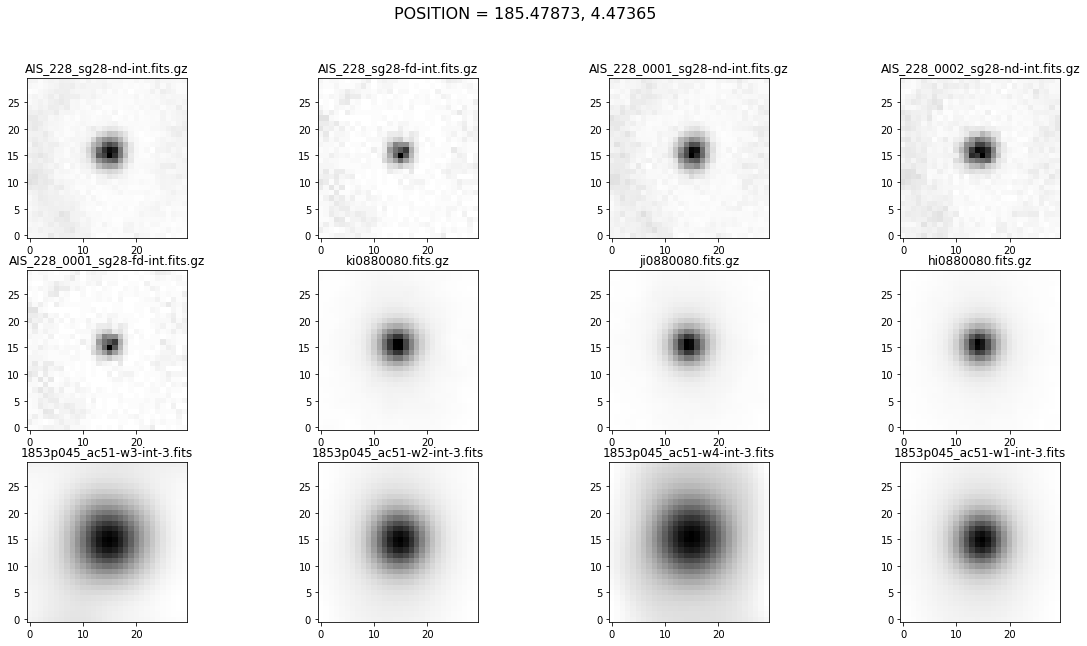

In [235]:
import matplotlib.pyplot as plt
from astropy.nddata import Cutout2D
from astropy.coordinates import SkyCoord
from astropy.wcs import wcs
import astropy.io.fits as fits
import numpy as np
import os
from astropy.io.fits import getdata, getheader
import astropy.units as u

#Set up the figure.
fig = plt.figure(figsize=(20,10))
plt.suptitle('POSITION = '+ra+', '+dec, fontsize=16)

#For each image,
i = 0
for filename in downloaded_images['filename']:
    
    #Make the title be the filename
    filename = downloaded_images['filename'][i]
    title = filename
    
    #Read in the image, header, and WCS
    data = getdata(filename, 0)
    header = getheader(filename, 0)
    w = wcs.WCS(header)

    #Make a cutout centered on the search position, with a 30 arcsec width.
    position = SkyCoord(ra, dec, unit = 'deg')
    size = 30.0 #* u.arcsec
    cutout = Cutout2D(data, position, (size, size), wcs=w)

    #Make a subplot for this image.
    ax = fig.add_subplot(3,4,i+1)
    ax.imshow(cutout.data, cmap='gray_r', origin='lower')
    ax.set_title(title)
    
    i = i + 1
    
plt.show()

### Exercise: Sort the images by wavelength. Remove GALEX single-epoch files. Add mission labels and wavebands.

<a href = "#toc">Table of Contents</a>

<a id='simpleconesearch'></a>

## 10. Catalogs: Simple Cone Search

The Simple Cone Search (SCS) protocol is used to search a catalog for entries with positions that fall within a given search region, specified by a position and cone search radius.

More information about SCS is available here:
http://www.ivoa.net/documents/latest/ConeSearch.html

Suppose we were considering proposing for observing time with Chandra. We might first want to check whether any of our sources were already observed by Chandra, XMM or ROSAT. Below, we show the search for the table 'chanmaster', the master catalog of observed Chandra targets, with a search radius of 0.1 degrees.

### Exercise: How would you figure out the table name 'chanmaster' for yourself? Hint: combine examples 4a and 4b above.

In [236]:
#For each galaxy in our list,
for i in range(len(list_of_galaxies)):
    
    #Specify the Base URL of HEASARC's cone search service.
    Base_URL = 'https://heasarc.gsfc.nasa.gov/cgi-bin/vo/cone/coneGet.pl'
    
    #Specify the table to search, as well as the RA, DEC, and Search Radius that define the search region.
    params = {'table': 'chanmaster', 'RA': list_of_galaxies[i]['ra'], 'DEC':list_of_galaxies[i]['dec'], 'SR':0.1}

    #Send the request URL.
    r = requests.get(Base_URL, params=params)

    #Convert the results from VO Table to Astropy Table.
    table=Table.read(io.BytesIO(r.content))
    
    #Print the table.
    if (len(table) > 0):
        print('object: ', i)
        print(table)
        print('')

object:  3
obsid  status      name        ra    ... type    pi    public_date Search_Offset
                              deg    ...                   mjd                  
----- -------- ----------- --------- ... ---- -------- ----------- -------------
 7937 archived NGC2563-P14 125.81833 ...   GO Mulchaey       54461        4.7670

object:  10
obsid  status    name      ra    ... type  pi  public_date Search_Offset
                          deg    ...               mjd                  
----- -------- ------- --------- ... ---- ---- ----------- -------------
 2043 archived ARP 242 191.55083 ...   GO Read       52429        0.5376

object:  13
obsid  status    name       ra    ... type    pi   public_date Search_Offset
                           deg    ...                  mjd                  
----- -------- -------- --------- ... ---- ------- ----------- -------------
19370 observed NGC 5297 206.59875 ...   GO McHardy       58417        1.5692

object:  25
obsid  status    name     

So we see that several galaxies in our sample have indeed already been observed, and we may wish to retrieve these images to see if they are deep enough to accomplish some of our science goals, or if we can justify additional exposures.

<a href = "#toc">Table of Contents</a>

<a id='tableaccessprotocol'></a>

## 11. Catalogs: Table Access Protocol (TAP)

We showed above how we can use NED to get the Spectral Energy Distribution of a galaxy. But if we wanted to investigate catalogs ourselves, we can use either the Simple Cone Search (SCS) Protocol above, or the Table Acess Protocol (TAP). SCS is easier to use, but limited to cone searches. TAP is more powerful, but at the cost of a bit of a learning curve. The registry examples above use TAP.

More information about TAP is available here:
http://www.ivoa.net/documents/TAP/

Let's use TAP to search the 2MASS catalog. Here we will use a synchronous query because we are doing a simple search that should return quickly. Users interested in searches that cover large areas or have complicated search criteria may wish to explore the asynchronous option.

In [237]:
#Define the search URL. Select all columns from the 2MASS Point Source Catalog (fp_psc)
#for rows that lie within 0.01 deg of the specified search position. 
tap_base_url = "https://irsa.ipac.caltech.edu/TAP/sync?"

tap_params = {
    "request":"doQuery",  # Specify the request type
    "lang":"ADQL",        # Specify the language
#    "query": "SELECT TOP 1 * FROM fp_psc" #Give the query in that language
    "query":
        """SELECT ra,dec,j_m,h_m,k_m FROM fp_psc
        where CONTAINS(POINT('J2000',ra,dec),CIRCLE('J2000',9.90704,8.96507,0.001))=1
        order by ra
        """
    }

# Send the search URL
r = requests.post(tap_base_url, data = tap_params)
#print(r.content)
# Convert the results into an astropy table.
table=Table.read(io.BytesIO(r.content))

#Print the table.
#table.pprint(max_width=-1)
#print(table['ra', 'dec', 'j_m', 'h_m', 'k_m'])
table.show_in_notebook()

idx,ra,dec,j_m,h_m,k_m
,deg,deg,mag,mag,mag
0,9.906258,8.965453,14.672,12.303,11.907
1,9.906989,8.965503,13.988,13.029,12.424


<a href = "#toc">Table of Contents</a>

<a id='simplespectralaccess'></a>

## Simple Spectral Access (SSA)

The Simple Spectral Access (SSA) Protocol defines a uniform interface to remotely discover and access one dimensional spectra. 

More information about SSA is avialable here:
http://www.ivoa.net/documents/SSA/

Returning to our science example, suppose that we have analyzed the available Chandra image for the matches above and discovered that one of these galaxies appears to have a potential ultraluminous X-ray source (ULX)! Now, we want to charatcterize the spectrum for this source. Therefore we will ask for a large exposure time and need to justify this by showing the spectrum of a prototypical ULX, M82 X-1.

In [239]:
import astropy.io.fits as fits
import astropy.coordinates as coord

m82=coord.SkyCoord.from_name("m82")
pos='{},{}'.format(m82.ra.deg,m82.dec.deg)

params = {'table': 'chanmaster',"POS":pos,"SIZE":".01", "REQUEST":"queryData"}

r = requests.get('https://heasarc.nasa.gov/xamin/vo/ssa', params=params)

spec_table = Table.read(io.BytesIO(r.content))
spec_table.show_in_notebook()

idx,obsid,status,name,ra,dec,time,detector,grating,exposure,type,pi,public_date,SSA_datalength,SSA_datamodel,SSA_title,SSA_instrument,SSA_publisher,SSA_tmid,SSA_stop_time,SSA_start_time,SSA_duration,SSA_bandpass,SSA_wavelength_max,SSA_wavelength_min,SSA_bandwidth,SSA_ra,SSA_dec,SSA_coord_obs,SSA_fov,SSA_reference,SSA_format
,,,,deg,deg,mjd,,,s,,,mjd,,,,,,mjd,mjd,mjd,s,meter,meter,meter,meter,deg,deg,deg,deg,,
0,17860,archived,M82 X-1,148.95917,69.67972,57639.729200000002,ACIS-S,HETG,51060,TOO,Walton,58010,12.0,Spectrum-1.0,acisf17860N002_pha2,ACIS-S,HEASARC,57640.040393247451,57640.350814633915,57639.729200000002,51060.0,3.16159e-09,6.1991999999999999e-09,1.2397999999999999e-10,6.0752199999999996e-09,148.95917,69.679720000000003,--,0.81103500403976259,https://heasarc.gsfc.nasa.gov/FTP/chandra/data/science/ao17/cat4/17860/primary/acisf17860N002_pha2.fits.gz,application/fits
1,19791,archived,M82 X-1,148.95917,69.67972,57641.570200000002,ACIS-S,HETG,15310,TOO,Walton,58010,12.0,Spectrum-1.0,acisf19791N002_pha2,ACIS-S,HEASARC,57641.668022753758,57641.765065583451,57641.570200000002,15310.0,3.16159e-09,6.1991999999999999e-09,1.2397999999999999e-10,6.0752199999999996e-09,148.95917,69.679720000000003,--,0.81103500403976259,https://heasarc.gsfc.nasa.gov/FTP/chandra/data/science/ao17/cat4/19791/primary/acisf19791N002_pha2.fits.gz,application/fits
2,19792,archived,M82 X-1,148.95917,69.67972,57642.353000000003,ACIS-S,HETG,32440,TOO,Walton,58010,12.0,Spectrum-1.0,acisf19792N002_pha2,ACIS-S,HEASARC,57642.558369954859,57642.762945849187,57642.353000000003,32440.0,3.16159e-09,6.1991999999999999e-09,1.2397999999999999e-10,6.0752199999999996e-09,148.95917,69.679720000000003,--,0.81103500403976259,https://heasarc.gsfc.nasa.gov/FTP/chandra/data/science/ao17/cat4/19792/primary/acisf19792N002_pha2.fits.gz,application/fits


In [240]:
## Get the first spectrum.
#The column SSA_reference is the one that contains the Access URL for the data.
hdu_list=fits.open(spec_table[0]['SSA_reference'].decode()) # Byte format, so just decode() to string

#Print the list of spectra.
table = Table(hdu_list[1].data)
table.show_in_notebook()


idx,SPEC_NUM,TG_M,TG_PART,TG_SRCID,X,Y,CHANNEL [8192],COUNTS [8192],STAT_ERR [8192],BACKGROUND_UP [8192],BACKGROUND_DOWN [8192],BIN_LO [8192],BIN_HI [8192]
0,1,-3,1,1,4103.92,4072.69,1 .. 8192,0 .. 0,1.86603 .. 1.86603,0 .. 0,0 .. 0,7.15916666667 .. 0.333333333333,7.16 .. 0.334166666667
1,2,-2,1,1,4103.92,4072.69,1 .. 8192,0 .. 0,1.86603 .. 1.86603,0 .. 0,0 .. 0,10.73875 .. 0.5,10.74 .. 0.50125
2,3,-1,1,1,4103.92,4072.69,1 .. 8192,0 .. 0,1.86603 .. 1.86603,0 .. 0,0 .. 0,21.4775 .. 1.0,21.48 .. 1.0025
3,4,1,1,1,4103.92,4072.69,1 .. 8192,0 .. 0,1.86603 .. 1.86603,0 .. 0,0 .. 0,21.4775 .. 1.0,21.48 .. 1.0025
4,5,2,1,1,4103.92,4072.69,1 .. 8192,0 .. 0,1.86603 .. 1.86603,0 .. 0,0 .. 0,10.73875 .. 0.5,10.74 .. 0.50125
5,6,3,1,1,4103.92,4072.69,1 .. 8192,0 .. 0,1.86603 .. 1.86603,0 .. 0,0 .. 0,7.15916666667 .. 0.333333333333,7.16 .. 0.334166666667
6,7,-3,2,1,4103.92,4072.69,1 .. 8192,0 .. 0,1.86603 .. 1.86603,0 .. 0,0 .. 0,13.985 .. 0.333333333333,13.9866666667 .. 0.335
7,8,-2,2,1,4103.92,4072.69,1 .. 8192,0 .. 0,1.86603 .. 1.86603,0 .. 0,0 .. 0,20.9775 .. 0.5,20.98 .. 0.5025
8,9,-1,2,1,4103.92,4072.69,1 .. 8192,0 .. 0,1.86603 .. 1.86603,0 .. 0,0 .. 0,41.955 .. 1.0,41.96 .. 1.005
9,10,1,2,1,4103.92,4072.69,1 .. 8192,0 .. 0,1.86603 .. 1.86603,0 .. 0,0 .. 0,41.955 .. 1.0,41.96 .. 1.005


<a href = "#toc">Table of Contents</a>